In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime


import requests
import time
import json
import ast

from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from scipy.stats import gaussian_kde
from scipy.spatial.distance import euclidean

import warnings

# FutureWarning 무시 설정
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# MAPPING ITEM

In [ ]:
# 로그에따라 아이템 값 이름이 달라서 통일시켜주어야 한다.

mapping = {
    'Item_Weapon_M16A4_C': 'WeapM16A4_C',
    'Item_Weapon_HK416_C': 'WeapHK416_C',
    'Item_Weapon_AK47_C': 'WeapAK47_C',
    'Item_Weapon_SCAR-L_C': 'WeapSCAR-L_C',
    'Item_Weapon_G36C_C': 'WeapG36C_C',  # Not present in the second list
    'Item_Weapon_BerylM762_C': 'WeapBerylM762_C',
    'Item_Weapon_QBZ95_C': 'WeapQBZ95_C',
    'Item_Weapon_Mk47Mutant_C': 'WeapMk47Mutant_C',
    'Item_Weapon_AUG_C': 'WeapAUG_C',
    'Item_Weapon_Groza_C': 'WeapGroza_C',
    'Item_Weapon_ACE32_C': 'WeapACE32_C',
    'Item_Weapon_FAMASG2_C': 'WeapFamasG2_C',
    'Item_Weapon_K2_C': 'WeapK2_C',
    'Item_Weapon_Mini14_C': 'WeapMini14_C',
    'Item_Weapon_SKS_C': 'WeapSKS_C',
    'Item_Weapon_Mk14_C': 'WeapMk14_C',
    'Item_Weapon_Mk12_C': 'WeapMk12_C',
    'Item_Weapon_SLR_C': 'WeapSLR_C',  # Not present in the second list
    'Item_Weapon_QBU88_C': 'WeapQBU88_C',
    'Item_Weapon_VSS_C': 'WeapVSS_C',
    'Item_Weapon_Dragunov_C': 'WeapDragunov_C',
    'Item_Weapon_FNFal_C': 'WeapFNFal_C',
    'Item_Weapon_UZI_C': 'WeapUZI_C',
    'Item_Weapon_Vector_C': 'WeapVector_C',
    'Item_Weapon_UMP_C': 'WeapUMP_C',
    'Item_Weapon_TommyGun_C': 'WeapTommyGun_C',  # Not present in the second list
    'Item_Weapon_Thompson_C': 'WeapThompson_C',
    'Item_Weapon_Thompson_Old_C': 'WeapThompson_old_C',
    'Item_Weapon_PP19Bizon_C': 'WeapPP19Bizon_C',  # Not present in the second list
    'Item_Weapon_MP5K_C': 'WeapMP5K_C',  # Not present in the second list
    'Item_Weapon_P90_C': 'WeapP90_C',
    'Item_Weapon_JS9_C': 'WeapJS9_C',
    'Item_Weapon_BizonPP19_C': 'WeapBizonPP19_C',
    'Item_Weapon_vz61Skorpion_C': 'Weapvz61Skorpion_C',
    'Item_Weapon_S686_C': 'WeapS686_C',  # Not present in the second list
    'Item_Weapon_S1897_C': 'WeapS1897_C',  # Not present in the second list
    'Item_Weapon_S12K_C': 'WeapS12K_C',  # Not present in the second list
    'Item_Weapon_DP12_C': 'WeapDP12_C',
    'Item_Weapon_SawedOff_C': 'WeapSawnoff_C',
    'Item_Weapon_Saiga12_C': 'WeapSaiga12_C',
    'Item_Weapon_Berreta686_C': 'WeapBerreta686_C',
    'Item_Weapon_AWM_C': 'WeapAWM_C',
    'Item_Weapon_M24_C': 'WeapM24_C',
    'Item_Weapon_Kar98k_C': 'WeapKar98k_C',
    'Item_Weapon_Win94_C': 'WeapWinchester_C',
    'Item_Weapon_MosinNagant_C': 'WeapMosinNagant_C',
    'Item_Weapon_LynxAMR_C': 'WeapLynxAMR_C',  # Not present in the second list
    'Item_Weapon_Winchester_C': 'WeapWinchester_C',
    'Item_Weapon_Mosin_C': 'WeapMosin_C',
    'Item_Weapon_Mortar_C': 'WeapMortar_C',  # Not present in the second list
    'Item_Weapon_PanzerFaust100M_C': 'WeapPanzerFaust100M_C',  # Not present in the second list
    'Item_Weapon_Crossbow_C': 'WeapCrossbow_1_C',
    'Item_Weapon_M249_C': 'WeapM249_C',
    'Item_Weapon_DP28_C': 'WeapDP28_C',
    'Item_Weapon_MG3_C': 'WeapMG3_C',
    'Item_Weapon_G18_C': 'WeapG18_C',
    'Item_Weapon_M1911_C': 'WeapM1911_C',
    'Item_Weapon_M9_C': 'WeapM9_C',
    'Item_Weapon_Rhino_C': 'WeapRhino_C',
    'Item_Weapon_NagantM1895_C': 'WeapNagantM1895_C',
    'Item_Weapon_Deagle_C': 'WeapDeagle_C',  # Not present in the second list
    'Item_Weapon_Pan_C': 'WeapPan_C',
    'Item_Weapon_Sickle_C': 'WeapSickle_C',  # Not present in the second list
    'Item_Weapon_Machete_C': 'WeapMachete_C',  # Not present in the second list
    'Item_Weapon_Crowbar_C': 'WeapCrowbar_C',  # Not present in the second list
    'Item_Weapon_Grenade_C': 'WeapGrenade_C',  # Not present in the second list
    'Item_Weapon_Molotov_Cocktail_C': 'WeapMolotov_Cocktail_C',  # Not present in the second list
    'Item_Weapon_SmokeBomb_C': 'WeapSmokeBomb_C',  # Not present in the second list
    'Item_Weapon_StickyGrenade_C': 'WeapStickyGrenade_C',  # Not present in the second list
    'Item_Weapon_StunGrenade_C': 'WeapStunGrenade_C'  # Not present in the second list
}


item_mapping = {   # Helmets
    'Item_Head_F_01_Lv1_C': 'Helmet_Lv1',
    'Item_Head_F_02_Lv1_C': 'Helmet_Lv1',
    'Item_Head_G_01_Lv2_C': 'Helmet_Lv2',
    'Item_Head_G_02_Lv2_C': 'Helmet_Lv2',
    'Item_Head_H_01_Lv3_C': 'Helmet_Lv3',
    'Item_Head_H_02_Lv3_C': 'Helmet_Lv3',

    # Vests
    'Item_Armor_E_01_Lv1_C': 'Vest_Lv1',
    'Item_Armor_E_02_Lv1_C': 'Vest_Lv1',
    'Item_Armor_F_01_Lv2_C': 'Vest_Lv2',
    'Item_Armor_F_02_Lv2_C': 'Vest_Lv2',
    'Item_Armor_G_01_Lv3_C': 'Vest_Lv3',
    'Item_Armor_G_02_Lv3_C': 'Vest_Lv3',

    # Backpacks
    'Item_Back_E_01_Lv1_C': 'Backpack_Lv1',
    'Item_Back_E_02_Lv1_C': 'Backpack_Lv1',
    'Item_Back_F_01_Lv2_C': 'Backpack_Lv2',
    'Item_Back_F_02_Lv2_C': 'Backpack_Lv2',
    'Item_Back_G_01_Lv3_C': 'Backpack_Lv3',
    'Item_Back_G_02_Lv3_C': 'Backpack_Lv3',

    # Meds and Boosts
    'Item_Heal_Bandage_C': 'Bandage',
    'Item_Heal_FirstAid_C': 'FirstAidKit',
    'Item_Heal_MedKit_C': 'MedKit',
    'Item_Boost_EnergyDrink_C': 'EnergyDrink',
    'Item_Boost_PainKiller_C': 'Painkiller',
    'Item_Boost_AdrenalineSyringe_C': 'AdrenalineSyringe',

    # Throwables
    'Item_Weapon_Grenade_C': 'FragGrenade',
    'Item_Weapon_Molotov_C': 'MolotovCocktail',
    'Item_Weapon_SmokeBomb_C': 'SmokeGrenade',
    'Item_Weapon_FlashBang_C': 'FlashBang',

    # Melee Weapons
    'Item_Weapon_Pan_C': 'Pan',
}



# 총기 부착물 attach 아이템 변수명 맵핑

attach_mapping = {
    # Upper 주로 조준경
    'Item_Attach_Weapon_Upper_Scope6x_C': 'Scope6x',
    'Item_Attach_Weapon_Upper_Thermal_C': 'Thermal',
    'Item_Attach_Weapon_Upper_Scope3x_C': 'Scope3x',
    'Item_Attach_Weapon_Upper_CQBSS_C': 'CQBSS',
    'Item_Attach_Weapon_Upper_DotSight_01_C': 'DotSight_01',
    'Item_Attach_Weapon_Upper_ACOG_01_C': 'ACOG_01',
    'Item_Attach_Weapon_Upper_PM2_01_C': 'PM2_01',
    'Item_Attach_Weapon_Upper_Holosight_C': 'Holosight',
    'Item_Attach_Weapon_Upper_Aimpoint_C': 'Aimpoint',

    # Muzzle 총구 부분, 소음기, 소염기 등
    'Item_Attach_Weapon_Muzzle_FlashHider_Medium_C': 'FlashHider_Medium',
    'Item_Attach_Weapon_Muzzle_Suppressor_SniperRifle_C': 'Suppressor_SniperRifle',
    'Item_Attach_Weapon_Muzzle_Duckbill_C': 'Duckbill',
    'Item_Attach_Weapon_Muzzle_FlashHider_Large_C': 'FlashHider_Large',
    'Item_Attach_Weapon_Muzzle_Compensator_Medium_C': 'Compensator_Medium',
    'Item_Attach_Weapon_Muzzle_Compensator_SniperRifle_C': 'Compensator_SniperRifle',
    'Item_Attach_Weapon_Muzzle_FlashHider_SniperRifle_C': 'FlashHider_SniperRifle',
    'Item_Attach_Weapon_Muzzle_Choke_C': 'Choke',
    'Item_Attach_Weapon_Muzzle_Compensator_Large_C': 'Compensator_Large',
    'Item_Attach_Weapon_Muzzle_Suppressor_Large_C': 'Suppressor_Large',
    'Item_Attach_Weapon_Muzzle_Suppressor_Medium_C': 'Suppressor_Medium',

    # Magazine 총기의 탄창, 퀵드로우, 대용량 탄창등
    'Item_Attach_Weapon_Magazine_ExtendedQuickDraw_SniperRifle_C': 'ExtendedQuickDraw_SniperRifle',
    'Item_Attach_Weapon_Magazine_Extended_Medium_C': 'Extended_Medium',
    'Item_Attach_Weapon_Magazine_QuickDraw_Medium_C': 'QuickDraw_Medium',
    'Item_Attach_Weapon_Magazine_Extended_Large_C': 'Extended_Large',
    'Item_Attach_Weapon_Magazine_Extended_SniperRifle_C': 'Extended_SniperRifle',
    'Item_Attach_Weapon_Magazine_QuickDraw_Large_C': 'QuickDraw_Large',
    'Item_Attach_Weapon_Magazine_ExtendedQuickDraw_Medium_C': 'ExtendedQuickDraw_Medium',
    'Item_Attach_Weapon_Magazine_ExtendedQuickDraw_Large_C': 'ExtendedQuickDraw_Large',


    # SideRail ? 총기의 측면 부착물
    'Item_Attach_Weapon_SideRail_DotSight_RMR_C': 'DotSight_RMR',
    'Item_Attach_Weapon_Stock_SniperRifle_CheekPad_C': 'CheekPad_SniperRifle',
    'Item_Attach_Weapon_Stock_SniperRifle_BulletLoops_C': 'BulletLoops_SniperRifle',
    'Item_Attach_Weapon_Stock_UZI_C': 'UZI_Stock',

    # Lower 손잡이나 그립
    'Item_Attach_Weapon_Lower_ThumbGrip_C': 'ThumbGrip',
    'Item_Attach_Weapon_Lower_Foregrip_C': 'Foregrip',
    'Item_Attach_Weapon_Lower_HalfGrip_C': 'HalfGrip',
    'Item_Attach_Weapon_Lower_AngledForeGrip_C': 'AngledForeGrip',
    'Item_Attach_Weapon_Lower_LightweightForeGrip_C': 'LightweightForeGrip',
    'Item_Attach_Weapon_Lower_LaserPointer_C': 'LaserPointer',

    # Stock 총기 개머리판 ,패드?
    'Item_Attach_Weapon_Stock_AR_HeavyStock_C': 'AR_HeavyStock',
    'Item_Attach_Weapon_Stock_AR_Composite_C': 'AR_Composite',

    }

Upper = ['Scope6x', 'Thermal', 'Scope3x', 'CQBSS', 'DotSight_01', 'ACOG_01', 'PM2_01', 'Holosight', 'Aimpoint']

Muzzle= ['FlashHider_Medium', 'Suppressor_SniperRifle', 'Duckbill', 'FlashHider_Large', 'Compensator_Medium',
            'Compensator_SniperRifle', 'FlashHider_SniperRifle', 'Choke', 'Compensator_Large', 'Suppressor_Large',
            'Suppressor_Medium']

Magazine = ['ExtendedQuickDraw_SniperRifle', 'Extended_Medium', 'QuickDraw_Medium', 'Extended_Large',
              'Extended_SniperRifle', 'QuickDraw_Large', 'ExtendedQuickDraw_Medium', 'ExtendedQuickDraw_Large']

SideRail = ['DotSight_RMR', 'CheekPad_SniperRifle', 'BulletLoops_SniperRifle', 'UZI_Stock']


Lower = ['ThumbGrip', 'Foregrip', 'HalfGrip', 'AngledForeGrip', 'LightweightForeGrip', 'LaserPointer']

Stock = ['AR_HeavyStock', 'AR_Composite']


# 무기 장르 목록
AR = [
    'Item_Weapon_M16A4_C', 'Item_Weapon_HK416_C', 'Item_Weapon_AK47_C',
    'Item_Weapon_SCAR-L_C', 'Item_Weapon_G36C_C', 'Item_Weapon_BerylM762_C', 'Item_Weapon_QBZ95_C', 'Item_Weapon_Mk47Mutant_C',
    'Item_Weapon_AUG_C', 'Item_Weapon_Groza_C', 'Item_Weapon_ACE32_C', 'Item_Weapon_FAMASG2_C', 'Item_Weapon_K2_C',
    'WeapM16A4_C', 'WeapHK416_C', 'WeapAK47_C', 'WeapSCAR-L_C', 'WeapG36C_C', 'WeapBerylM762_C', 'WeapQBZ95_C', 'WeapMk47Mutant_C',
    'WeapAUG_C', 'WeapGroza_C', 'WeapACE32_C', 'WeapFamasG2_C', 'WeapK2_C'
]

DMR = [
    'Item_Weapon_Mini14_C', 'Item_Weapon_SKS_C', 'Item_Weapon_Mk14_C', 'Item_Weapon_Mk12_C', 'Item_Weapon_SLR_C',
    'Item_Weapon_QBU88_C', 'Item_Weapon_VSS_C', 'Item_Weapon_Dragunov_C', 'Item_Weapon_FNFal_C',
    'WeapMini14_C', 'WeapSKS_C', 'WeapMk14_C', 'WeapMk12_C', 'WeapSLR_C', 'WeapQBU88_C', 'WeapVSS_C', 'WeapDragunov_C', 'WeapFNFal_C'
]

SMG = [
    'Item_Weapon_UZI_C', 'Item_Weapon_Vector_C', 'Item_Weapon_UMP_C', 'Item_Weapon_TommyGun_C', 'Item_Weapon_Thompson_C', 'Item_Weapon_Thompson_Old_C',
    'Item_Weapon_PP19Bizon_C', 'Item_Weapon_MP5K_C', 'Item_Weapon_P90_C', 'Item_Weapon_JS9_C', 'Item_Weapon_BizonPP19_C',
    'WeapUZI_C', 'WeapVector_C', 'WeapUMP_C', 'WeapTommyGun_C', 'WeapThompson_C', 'WeapThompson_old_C', 'WeapPP19Bizon_C', 'WeapMP5K_C', 'WeapP90_C', 'WeapJS9_C', 'WeapBizonPP19_C', 'Weapvz61Skorpion_C'
]

SG = [
    'Item_Weapon_S686_C', 'Item_Weapon_S1897_C', 'Item_Weapon_S12K_C', 'Item_Weapon_DP12_C', 'Item_Weapon_SawedOff_C', 'Item_Weapon_Saiga12_C', 'Item_Weapon_Berreta686_C',
    'WeapS686_C', 'WeapS1897_C', 'WeapS12K_C', 'WeapDP12_C', 'WeapSawnoff_C', 'WeapSaiga12_C', 'WeapBerreta686_C'
]

SR = [
    'Item_Weapon_AWM_C', 'Item_Weapon_M24_C', 'Item_Weapon_Kar98k_C', 'Item_Weapon_Win94_C', 'Item_Weapon_MosinNagant_C', 'Item_Weapon_LynxAMR_C', 'Item_Weapon_Winchester_C', 'Item_Weapon_Mosin_C',
    'WeapAWM_C', 'WeapM24_C', 'WeapKar98k_C', 'WeapWinchester_C', 'WeapMosinNagant_C', 'WeapLynxAMR_C', 'WeapWinchester_C', 'WeapMosin_C'
]

Special = [
    'Item_Weapon_FlareGun_C', 'Item_Weapon_Mortar_C', 'Item_Weapon_PanzerFaust100M_C', 'Item_Weapon_Ziplinegun_C', 'Item_Weapon_Crossbow_C',
    'WeapMortar_C', 'WeapPanzerFaust100M_C', 'WeapCrossbow_1_C'
]

LMG = [
    'Item_Weapon_M249_C', 'Item_Weapon_DP28_C', 'Item_Weapon_MG3_C',
    'WeapM249_C', 'WeapDP28_C', 'WeapMG3_C'
]

P = [
    'Item_Weapon_G18_C', 'Item_Weapon_M1911_C', 'Item_Weapon_M9_C', 'Item_Weapon_Rhino_C', 'Item_Weapon_NagantM1895_C', 'Item_Weapon_Deagle_C',
    'WeapG18_C', 'WeapM1911_C', 'WeapM9_C', 'WeapRhino_C', 'WeapNagantM1895_C', 'WeapDeagle_C','Item_Weapon_vz61Skorpion_C'
]

Melee = [
    'Item_Weapon_Pan_C', 'Item_Weapon_Sickle_C', 'Item_Weapon_Machete_C', 'Item_Weapon_Crowbar_C',
    'WeapPan_C', 'WeapSickle_C', 'WeapMachete_C', 'WeapCrowbar_C'
]

Throwables = [
    'Item_Weapon_Grenade_C', 'Item_Weapon_Molotov_Cocktail_C', 'Item_Weapon_SmokeBomb_C', 'Item_Weapon_StickyGrenade_C', 'Item_Weapon_StunGrenade_C',
    'WeapGrenade_C', 'WeapMolotov_Cocktail_C', 'WeapSmokeBomb_C', 'WeapStickyGrenade_C', 'WeapStunGrenade_C'
]



In [ ]:
API_URL = "https://api.pubg.com"
API_KEY = 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9..FWqr78vTTarW0dc8Vqtk6oWzLAOOk8a6Otq0M-bvDDQ'

# 요청 헤더 설정
headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Accept": "application/vnd.api+json"
}

In [ ]:
# player id 별 matchid
def get_player_id(player_name):
    endpoint = f"/shards/steam/players?filter[playerNames]={player_name}"
    response = requests.get(API_URL + endpoint, headers=headers)
    if response.status_code == 200:
        data = response.json()
        if data:
            player_data = data['data'][0]
            matchids = player_data['relationships']['matches']['data']
            player_id = player_data['id']
            return player_id, matchids
        else:
            print(f"플레이어 {player_name}을 찾을 수 없습니다.")
            return None
    elif response.status_code == 429:
        print("API 요청이 너무 많습니다. 1분 동안 쉽니다.")
        time.sleep(60)  # 1분 동안 코드 실행을 지연시킵니다.
        return get_player_id(player_name)  # 재귀적으로 다시 시도합니다.
    else:
        print(f"Error: {response.status_code}")
        return None



# matchid 별 경기
def get_match_detail(match_id):
    url = 'https://api.pubg.com/shards/steam/matches/{}'
    url = url.format(match_id)
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None


# matchid 별로 경기 요약
# def get_match_details(match_ids):
#     all_match_details = []

#     for match_id in match_ids:
#         url = f'https://api.pubg.com/shards/steam/matches/{match_id}'
#         response = requests.get(url, headers=headers)

#         if response.status_code == 200:
#             all_match_details.append(response.json())

#         else:
#             print(f"Error: {response.status_code} for match ID {match_id}")

#     return all_match_details


#matchid 별로 경기 요약
def get_match_details(match_ids):
    all_match_details = []

    for i, match_id in enumerate(match_ids):
        url = f'https://api.pubg.com/shards/steam/matches/{match_id}'
        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            all_match_details.append(response.json())
        else:
            print(f"Error: {response.status_code} for match ID {match_id}")

        # 10개마다 1분 대기
        if (i + 1) % 10 == 0:
            print("Reached 10 requests, waiting for 1 minute...")
            time.sleep(60)

    return all_match_details


# weaponMasterySummary
def get_player_weapon(player_id):
    url = f'https://api.pubg.com/shards/steam/players/{player_id}/weapon_mastery'
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None



# SurvivalMasterySummary
def get_player_survival(player_id):
    url = f'https://api.pubg.com/shards/steam/players/{player_id}/survival_mastery'
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None



def get_rank(player_id):
  #  Rank 정보를 위한
  url = f'https://api.pubg.com/shards/steam/seasons'
  response = requests.get(url, headers=headers)
  seson = response.json()
  seasonId = seson['data'][-1:][0]['id']   # 가장 최근 시즌id

  # rank
  rank_url = f'https://api.pubg.com/shards/steam/players/{player_id}/seasons/{seasonId}/ranked'
  response = requests.get(rank_url, headers=headers)
  rank = response.json()
  return rank


def load_csv_in_chunks(url,chunk_size=500000):
    chunks = pd.read_csv(url , chunksize=chunk_size, encoding = "UTF-8")
    return pd.concat(chunks)

In [ ]:
url = '/content/drive/MyDrive/PUBG/player_df_0705.csv'
df = load_csv_in_chunks(url)

<ipython-input-4-9e78b1aa1af3>:118: DtypeWarning: Columns (0,4,38,40,41,44,45,46,47,48,49,50,52,53,54,56,57,58,65,66,67,100,102,103,104,105,107,108,109,110,114,115,117,118,126,127,128,129,130,131,135,136,137,138,139,141,142,143,160,161,162,163,164,172,173,174,175,176,177,178,179,180,182,183,191,192,193,194,195,196,197,198,199,201,202,210,211,212,213,214,215,216,217,218,220,223,224,232,233,234,235,236,237,238,242,243,246,247,255,256,257,258,259,262,266,267) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat(chunks)


In [ ]:
df['matchId'].unique()

array(['5200e3e0-05bb-48bc-8eba-98dc6c408d5f',
       'e68748a4-177b-48d3-bf80-4a961c23803e',
       '41da4633-9558-41fa-bc4e-4e789d4131d6',
       'ddef6c26-e51b-440c-8084-0b8a7b89adcc',
       '3212089f-4a7f-4657-ac3b-7c4a97a54b09'], dtype=object)

In [ ]:
player_name = 'ChunYang'
player_id, matchids = get_player_id(player_name)
matchids = [match['id'] for match in matchids]


In [ ]:
matchids

In [ ]:
matchids = matchids[:4]
matchids

['e0575041-7b7f-4d9a-b416-a65c9eb81000',
 '6e79f2f3-6619-4a81-9a6c-263abf3cd6eb',
 'd03a1f91-1c6b-4b3c-ad3b-d4e53cac2086',
 '5bd5fc61-8350-4a7a-ac8f-90d62e37968b']

In [ ]:
match_datas = get_match_details(matchids)

In [ ]:
player_weapon_mastery = get_player_weapon(player_id)

# wak_weapon= pd.json_normalize(player_weapon_mastery)
weaponSummaries = player_weapon_mastery['data']['attributes']['weaponSummaries']

# Initialize a list to store the data
data = []

# Loop through each weapon and add the weapon name to the data
for weapon, stats in weaponSummaries.items():
    stats['weapon.itemid'] = weapon
    data.append(stats)

# Create the dataframe
weapon_summaries_df = pd.json_normalize(data)
columns = [col for col in weapon_summaries_df.columns if col.startswith("OfficialStatsTotal")]
cols =  ['weapon.itemid','XPTotal','LevelCurrent'] + columns
weapon_summaries_df[weapon_summaries_df['XPTotal'] > 0][cols].sort_values(by=['XPTotal'], ascending=False)

In [ ]:
rank = get_rank(player_id)
rank

In [ ]:
len(match_data['data']['relationships']['rosters']['data'])

100

In [ ]:
log_details = []
all_match_static = []
for i in range(len(matchids)):
    match_data = match_datas[i]

    if match_data is None:
        continue  # match_datas[i]가 None인 경우 건너뜁니다.

    match_static = pd.json_normalize(match_data['included'], sep='_')
    all_match_static.append(match_static)

    # GameMode와 MapName 정보를 가져와서 DataFrame에 추가합니다.
    matchId = match_data['data']['id']
    game_mode = match_data['data']['attributes']['gameMode']
    map_name = match_data['data']['attributes']['mapName']

    # match_static DataFrame에 새로운 컬럼을 추가합니다.
    match_static['GameMode'] = game_mode
    match_static['MapName'] = map_name
    match_static['matchId'] = matchId


    # 각 asset의 URL과 관련 정보를 함께 저장합니다.
    asset_urls = match_static[match_static['type'] == 'asset']['attributes_URL'].tolist()
    for url in asset_urls:
        log_details.append({
            'url': url,
            'game_mode': game_mode,
            'map_name': map_name,
            'matchId': matchId,
        })



result = pd.concat(all_match_static, ignore_index=True)
result.columns = result.columns.str.replace('attributes_stats_', '')

In [ ]:
haram = result[result['type'] == 'participant']
haram.head()

In [ ]:
tier_bg = ['70be96aa-522d-4562-bcd5-01d5c03becda' , 'c915908c-1711-4f32-8282-e43a12f358ee', 'd09e1aad-2e81-4766-8359-2782509a5e6e', '3a886aaa-d350-460e-bd0d-d030d33b7b3e','29d47a3b-774c-48c7-a88b-e2831cbdc28b',
'3c46a9ef-ee82-4904-99b6-85853253235a','4541277f-1128-4597-8946-64de770baae4']

In [ ]:
tier_bg_result = result[(result['type'] == 'participant') & (result['matchId'].isin(tier_bg))][['name','DBNOs','assists','damageDealt','headshotKills','killStreaks', 'kills','timeSurvived','GameMode'	,'MapName',	'matchId']]

In [ ]:
match_result_0711 = result[result['name'] == 'wakgood']

In [ ]:
# 10분 이상 진행된거
wak_result = result[result['name'] ==player_name]
wak_result['timeSurvived'] = wak_result['timeSurvived'] / 60
plus_list= wak_result[wak_result['timeSurvived'] > 10]['matchId'].tolist()
plus_list

<ipython-input-53-9dc301658dd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wak_result['timeSurvived'] = wak_result['timeSurvived'] / 60


['5200e3e0-05bb-48bc-8eba-98dc6c408d5f',
 'e68748a4-177b-48d3-bf80-4a961c23803e',
 '41da4633-9558-41fa-bc4e-4e789d4131d6',
 'ddef6c26-e51b-440c-8084-0b8a7b89adcc',
 '3212089f-4a7f-4657-ac3b-7c4a97a54b09']

In [ ]:
# prompt: log_details 의 matchid 키가 tier_bg 리스트 안에 있는 것들만 가져와

log_details = [item for item in log_details if item['matchId'] in tier_bg]

In [ ]:
def get_details(log_details):
  all_logs = []
  for i, detail in enumerate(log_details):
      url = detail['url']
      response = requests.get(url, headers=headers)
      if response.status_code == 200:
          logs = response.json()
          df = pd.json_normalize(logs)
          df['GameMode'] = detail['game_mode']
          df['MapName'] = detail['map_name']
          df['matchId'] = detail['matchId']
          all_logs.append(df)
      else:
          print(f"Failed to fetch data from {url}: {response.status_code}")

      # 10개마다 1분 대기
      if (i + 1) % 10 == 0:
          print("Reached 10 requests, waiting for 1 minute...")
          time.sleep(60)

  # 모든 로그 DataFrame을 결합합니다.
  all_logs_df = pd.concat(all_logs, ignore_index=True)

  return all_logs_df

wak_recent_df = get_details(log_details)

wak_recent_df.head()

MatchId PingQuality  \
0  match.bro.custom.c2824509f5a64692bdbd999c8c981...               
1                                                NaN         NaN   
2                                                NaN         NaN   
3                                                NaN         NaN   
4                                                NaN         NaN   

                            _D                  _T  \
0  2024-07-21T14:48:03.867813Z  LogMatchDefinition   
1     2024-07-21T14:46:10.182Z      LogPlayerLogin   
2     2024-07-21T14:46:10.335Z     LogPlayerCreate   
3     2024-07-21T14:46:10.336Z      LogPlayerLogin   
4     2024-07-21T14:46:10.348Z     LogPlayerCreate   

                                  accountId  common.isGame character.name  \
0                                       NaN            NaN            NaN   
1  account.8bf963f2baad459f808eefe43831ee86            0.0            NaN   
2                                       NaN            0.0      yuruchuru   
3  account.9d57cd5ed5ed470491b6f6002e976f9b            0.0            NaN   
4                                       NaN            0.0        42dada_   

   character.teamId  character.health  character.location.x  \
0               NaN               NaN                   NaN   
1               NaN               NaN                   NaN   
2              14.0             100.0          376471.59375   
3               NaN               NaN                   NaN   
4               9.0             100.0          347176.93750   

   character.location.y  character.location.z  character.ranking  \
0                   NaN                   NaN                NaN   
1                   NaN                   NaN                NaN   
2          65101.539062           8323.315430                0.0   
3                   NaN                   NaN                NaN   
4         752780.625000           -572.161987                0.0   

   character.individualRanking                       character.accountId  \
0                          NaN                                       NaN   
1                          NaN                                       NaN   
2                          0.0  account.8bf963f2baad459f808eefe43831ee86   
3                          NaN                                       NaN   
4                          0.0  account.9d57cd5ed5ed470491b6f6002e976f9b   

  character.isInBlueZone character.isInRedZone character.inSpecialZone  \
0                    NaN                   NaN                     NaN   
1                    NaN                   NaN                     NaN   
2                  False                 False                    None   
3                    NaN                   NaN                     NaN   
4                  False                 False                    None   

  character.isInVehicle character.zone character.type  vehicle  elapsedTime  \
0                   NaN            NaN            NaN      NaN          NaN   
1                   NaN            NaN            NaN      NaN          NaN   
2                 False             []           user      NaN          NaN   
3                   NaN            NaN            NaN      NaN          NaN   
4                 False             []           user      NaN          NaN   

   numAlivePlayers  attackId  fireWeaponStackCount attackType attacker.name  \
0              NaN       NaN                   NaN        NaN           NaN   
1              NaN       NaN                   NaN        NaN           NaN   
2              NaN       NaN                   NaN        NaN           NaN   
3              NaN       NaN                   NaN        NaN           NaN   
4              NaN       NaN                   NaN        NaN           NaN   

   attacker.teamId  attacker.health  attacker.location.x  attacker.location.y  \
0              NaN              NaN                  NaN                  NaN   
1              NaN              NaN           

In [ ]:
# prompt: wak_recent_df 에서 matchid, character 별로  '_T' 값이 LogParachuteLanding	 이전의 행은 지워줘

import pandas as pd
# 'matchId'와 'character'를 기준으로 그룹화합니다.
grouped = wak_recent_df.groupby(['matchId', 'character.name'])

# 각 그룹에 대해 'LogParachuteLanding' 이벤트 이전의 행을 제거합니다.
processed_dfs = []
for (match_id, character), group in grouped:
    # 'LogParachuteLanding' 이벤트의 인덱스를 찾습니다.
    landing_index = group[group['_T'] == 'LogParachuteLanding'].index

    # 'LogParachuteLanding' 이벤트가 없는 경우, 해당 그룹은 건너뜁니다.
    if landing_index.empty:
        continue

    # 'LogParachuteLanding' 이벤트 이후의 행만 선택합니다.
    processed_group = group.loc[landing_index[0]:]
    processed_dfs.append(processed_group)

# 처리된 DataFrame들을 다시 결합합니다.
result_df = pd.concat(processed_dfs, ignore_index=True)

# 결과를 확인합니다.
result_df[result_df['character.name'] == 'wakgood'].head(100)


In [ ]:
result_df[result_df['character.name'] == 'wakgood'].head(300)

In [ ]:
# player_df.head(200)
# match_datas 저장
# csv_file_path = '/content/drive/MyDrive/PUBG/haram_result.csv'
# haram.to_csv(csv_file_path, index=False)


csv_file_path = '/content/drive/MyDrive/PUBG/haram_log.csv'
wak_recent_df.to_csv(csv_file_path, index=False)

# wak data (파밍)

* 낙하산에서 떨어 지고 첫파밍 이후 3분동안의 파밍속도 계산
* 풀파밍이 완성되는 시간


In [ ]:
wak ="/content/drive/MyDrive/PUBG/player_df_06.csv"
wak2 ="/content/drive/MyDrive/PUBG/player_df_07.csv"
wak3 = '/content/drive/MyDrive/PUBG/player_df_0705.csv'
def load_csv_in_chunks(url,chunk_size=1000000):
    chunks = pd.read_csv(url , chunksize=chunk_size, encoding = "UTF-8")
    return pd.concat(chunks)



df = load_csv_in_chunks(wak)

In [ ]:
# pd.DataFrame(df.columns)
# df[['_T']].value_counts()
df[(df['_T'] == 'LogPlayerPosition') & (df['GameMode'] == 'normal-solo')].head()


MatchId  PingQuality                        _D                 _T  \
187666     NaN          NaN  2024-06-22T12:27:59.580Z  LogPlayerPosition   
187667     NaN          NaN  2024-06-22T12:27:59.580Z  LogPlayerPosition   
187668     NaN          NaN  2024-06-22T12:27:59.580Z  LogPlayerPosition   
187669     NaN          NaN  2024-06-22T12:27:59.580Z  LogPlayerPosition   
187670     NaN          NaN  2024-06-22T12:27:59.581Z  LogPlayerPosition   

       accountId  common.isGame character.name  character.teamId  \
187666       NaN            0.0     GO_sum_mer          100014.0   
187667       NaN            0.0    AmadeusChoi          100001.0   
187668       NaN            0.0  GEN_Adder0729          100032.0   
187669       NaN            0.0        WAK_RED          100081.0   
187670       NaN            0.0     Victory_W_          100068.0   

        character.health  character.location.x  character.location.y  \
187666             100.0           579746.3750         127127.429688   
187667             100.0           569062.1250         349940.843750   
187668             100.0           579627.4375         127029.109375   
187669             100.0           579864.7500         126764.414062   
187670             100.0           580590.0625         126348.648438   

        character.location.z  character.ranking  character.individualRanking  \
187666          24691.980469                0.0                          0.0   
187667             18.859207                0.0                          0.0   
187668          24725.441406                0.0                          0.0   
187669          24694.775391                0.0                          0.0   
187670          24690.580078                0.0                          0.0   

                             character.accountId character.isInBlueZone  \
187666  account.bb56c2ceeda74b94bde639d3b20b0240                  False   
187667  account.16640d11e0384e20887536388d1ccdb3                  False   
187668  account.d34b25ecbb2d4119adc6fddc52087f30                  False   
187669  account.ef69a681fd1345ef9372eb14b2d18009                  False   
187670  account.7ccac0816e104f53ae3ffae711324028                  False   

       character.isInRedZone character.zone character.type  vehicle  \
187666                 False             []           user      NaN   
187667                 False             []           user      NaN   
187668                 False             []           user      NaN   
187669                 False             []           user      NaN   
187670                 False             []           user      NaN   

        elapsedTime  numAlivePlayers  attackId  fireWeaponStackCount  \
187666          0.0             93.0       NaN                   NaN   
187667          0.0             93.0       NaN                   NaN   
187668          0.0             93.0       NaN                   NaN   
187669          0.0             93.0       NaN                   NaN   
187670          0.0             93.0       NaN                   NaN   

       attackType attacker.name  attacker.teamId  attacker.health  \
187666        NaN           NaN              NaN              NaN   
187667        NaN           NaN              NaN              NaN   
187668        NaN           NaN              NaN              NaN   
187669        NaN           NaN              NaN              NaN   
187670        NaN           NaN              NaN              NaN   

        attacker.location.x  attacker.location.y  attacker.location.z  \
187666                  NaN                  NaN                  NaN   
187667                  NaN                  NaN                  NaN   
187668                  NaN                  NaN                  NaN   
187669                  NaN                  NaN                  NaN   
187670                  NaN                  NaN                  NaN   

        attacker.ranking  attacker.individualRanking attacker.

In [ ]:
farming_col = ['matchId','_D','_T','MapName','GameMode',
                'character.name','character.health',
               'character.location.x', 'character.location.y','character.location.z',
                "item.itemId"	,"item.stackCount",	"item.category",
                "parentItem.itemId","parentItem.stackCount","parentItem.category", "parentItem.subCategory","parentItem.attachedItems",
                "childItem.itemId","childItem.stackCount","childItem.category","childItem.subCategory","childItem.attachedItems"]


In [ ]:
# 150만행, 한 경기당 평균적으고 3~4만행은 쌓인다
farming_df = df[df['_T'].isin(['LogItemDrop','LogItemDetach','LogItemAttach','LogItemEquip','LogItemPickup'])][farming_col]
# farming_ving_df = viming_df[viming_df['_T'].isin(['LogItemDrop','LogItemDetach','LogItemAttach','LogItemEquip','LogItemPickup'])][farming_col]

In [ ]:
farming_ving_df = farming_ving_df[
    (~farming_ving_df['item.itemId'].isin(['Item_Weapon_Apple_C','Item_Back_B_01_StartParachutePack_C','Item_Special_BackupParachute_C','Item_Special_Ascender_NoChicken_C','Item_Special_Bluechip_C']))
]

len(farming_df)

70741

In [ ]:
# match_datas 저장
csv_file_path = '/content/drive/MyDrive/PUBG/farming_df(0705).csv'
farming_df.to_csv(csv_file_path, index=False)

파밍 데이터 가져오기

In [ ]:
wak ="/content/drive/MyDrive/PUBG/farming_df(06).csv"
wak2 ="/content/drive/MyDrive/PUBG/farming_df(07).csv"
wak3 = '/content/drive/MyDrive/PUBG/farming_df(0705).csv'
def load_csv_in_chunks(url,chunk_size=1000000):
    chunks = pd.read_csv(url , chunksize=chunk_size, encoding = "UTF-8")
    return pd.concat(chunks)


df1 = load_csv_in_chunks(wak)
df2= load_csv_in_chunks(wak2)
df3 = load_csv_in_chunks(wak3)

In [ ]:
farming_df = pd.concat([df1,df2,df3])
farming_df.drop_duplicates(inplace=True)

 * 아이템 pick up 속도를 어떻게 볼 것인가
 * 아이템이 모여있는 경우도 있지만, 보통 계속 움직이면서 파밍을 하기 때문에 아이템간의 거리차이를 구해야함
 * 아이템간의 거리차이가 1m 미만인 경우 = 아이템이 뭉쳐있을 때로 볼 수 있음
 * 아이템을 pickup 하고 중간 중간 attach 하는것 까지 포함하려고 했지만, 자동으로 attach 되는 경우가 있다.

단순히 아이템을 줍는 시간을 계산하려면, 거리와 시간조건을 추가하는것이 좋다고 생각 ( 첫 파밍이후 3분 , 그리고 1m 미만의 뭉쳐있는 아이템)

 결론적으로 itemPickup, Drop 만 가져오기로함 부착물이 장착된 총기를 Drop하게 되면 detach 로그도 남겨짐


In [ ]:
farming_ving_df['_D'] = pd.to_datetime(farming_ving_df['_D'])
pickup_df_ving = farming_ving_df[farming_ving_df['_T'].isin(['LogItemPickup','LogitemDrop'])]

In [ ]:
farming_df['_D'] = pd.to_datetime(farming_df['_D'])
pickup_df = farming_df[farming_df['_T'].isin(['LogItemPickup','LogitemDrop'])]

In [ ]:
wak = pickup_df[pickup_df['character.name'] == 'wakgood']

In [ ]:
sample = wak[['matchId','_D','_T','character.name','character.location.x','character.location.y','character.location.z','item.itemId']].head(10)

In [ ]:
# 유저별로 그룹화
# grouped = pickup_df.groupby(['matchId','character.name'])
# grouped_ving = pickup_df_ving.groupby(['matchId','character.name'])

In [ ]:
# 유저별로 그룹화
grouped = pickup_df.groupby(['matchId','character.name'])

# 각 유저별 첫파밍을 시작으로 3분 동안 파밍한 로그를 구하고 파밍시간을 구합니다.
# 파밍한 아이템간의 좌표를 통해 1m 미만에 있는 경우 뭉쳐있는 아이템으로 파악 -> 이 기준으로 파밍시간을 체크

def farming_speed(group):
    group = group.sort_values('_D')  # 타임스탬프 기준으로 정렬
    end_D = group['_D'].min() + pd.Timedelta(minutes=3)

    group['time_diff'] = group['_D'].diff().dt.total_seconds()  # 시간 차이 계산
    # group['time_diff'].fillna(0, inplace=True)  # 첫파밍은 0으로

    # 거리 차이 계산
    group['x_diff'] = group['character.location.x'].diff() #.fillna(0)
    group['y_diff'] = group['character.location.y'].diff() #.fillna(0)
    group['z_diff'] = group['character.location.z'].diff() #.fillna(0)
    group['distance_diff'] = np.sqrt(group['x_diff']**2 + group['y_diff']**2 + group['z_diff']**2) / 100
    group = group[group['_D'] < end_D] # 첫파밍이후 3분 이내의 데이터만
    return group

# 각 그룹에 대해 함수 적용하여 필터링
df_with_check = grouped.apply(farming_speed).reset_index(drop=True)[['matchId','_D','_T','character.name','item.itemId','item.stackCount','item.category','parentItem.attachedItems','childItem.attachedItems',
                                                                     'character.location.x','character.location.y','character.location.z','time_diff','distance_diff']]

# df_with_check_ving = grouped_ving.apply(farming_speed).reset_index(drop=True)[['matchId','_D','_T','character.name','item.itemId','item.stackCount','item.category','parentItem.attachedItems','childItem.attachedItems',
#                                                                      'character.location.x','character.location.y','character.location.z','time_diff','distance_diff']]

In [ ]:
df_with_check[df_with_check['character.name'] == 'wakgood'].head(10)[['matchId','_D','_T','character.name','item.itemId',
                                                                     'character.location.x','character.location.y','character.location.z','time_diff','distance_diff']]


matchId                               _D  \
2885  028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:23.695000+00:00   
2886  028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:23.708000+00:00   
2887  028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:23.909000+00:00   
2888  028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:24.323000+00:00   
2889  028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:26.639000+00:00   
2890  028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:26.875000+00:00   
2891  028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:27.025000+00:00   
2892  028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:31.877000+00:00   
2893  028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:36.152000+00:00   
2894  028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:51.673000+00:00   

                 _T character.name                             item.itemId  \
2885  LogItemPickup        wakgood                         Item_Ammo_9mm_C   
2886  LogItemPickup        wakgood                      Item_Weapon_MP5K_C   
2887  LogItemPickup        wakgood                         Item_Ammo_9mm_C   
2888  LogItemPickup        wakgood                         Item_Ammo_9mm_C   
2889  LogItemPickup        wakgood                      Item_Weapon_AK47_C   
2890  LogItemPickup        wakgood                       Item_Ammo_762mm_C   
2891  LogItemPickup        wakgood                       Item_Ammo_762mm_C   
2892  LogItemPickup        wakgood                   Item_Armor_D_01_Lv2_C   
2893  LogItemPickup        wakgood  Item_Attach_Weapon_Upper_DotSight_01_C   
2894  LogItemPickup        wakgood                 Item_Weapon_BerylM762_C   

      character.location.x  character.location.y  character.location.z  \
2885         252403.296875          461672.62500            411.290009   
2886         252403.296875          461672.62500            411.290009   
2887         252399.593750          461670.90625            411.290009   
2888         252337.500000          461701.68750            411.290009   
2889         251732.593750          462123.90625            383.290009   
2890         251723.375000          462113.53125            383.290009   
2891         251727.187500          462117.90625            383.290009   
2892         251205.453125          462602.53125            383.380005   
2893         250571.578125          462851.09375            411.380005   
2894         249136.906250          463963.96875            383.399994   

      time_diff  distance_diff  
2885        NaN            NaN  
2886      0.013       0.000000  
2887      0.201       0.040826  
2888      0.414       0.693045  
2889      2.316       7.382169  
2890      0.236       0.138790  
2891      0.150       0.058031  
2892      4.852       7.120872  
2893      4.275       6.814432  
2894     15.521      18.159177

In [ ]:
# prompt: df_with_check[(df_with_check['distance_diff'] < 0.5) & (df_with_check['time_diff'] < 20)]  위 코드에서 0 이상 조건을 추가해줘

item_check = df_with_check[(df_with_check['distance_diff'] < 0.5) & (df_with_check['time_diff'] > 0) & (df_with_check['time_diff'] < 10)]


Timestamp('2024-06-13 16:54:56.659000+0000', tz='UTC')

In [ ]:
agg = item_check.groupby(['character.name']).agg(
    log_sum = pd.NamedAgg(column='_T', aggfunc='count'),
    time_mean = pd.NamedAgg(column='time_diff', aggfunc='mean'),
    time_max = pd.NamedAgg(column='time_diff', aggfunc='max'),
    distance_mean = pd.NamedAgg(column='distance_diff', aggfunc='mean'),
).reset_index()

wak_speed = agg[agg['character.name'] =='wakgood']['time_mean'].iloc[0]
ving_ming = agg[agg['character.name'] =='VINGMINGVINGMING']['time_mean'].iloc[0]


In [ ]:
wak_speed

0.6399488409272582

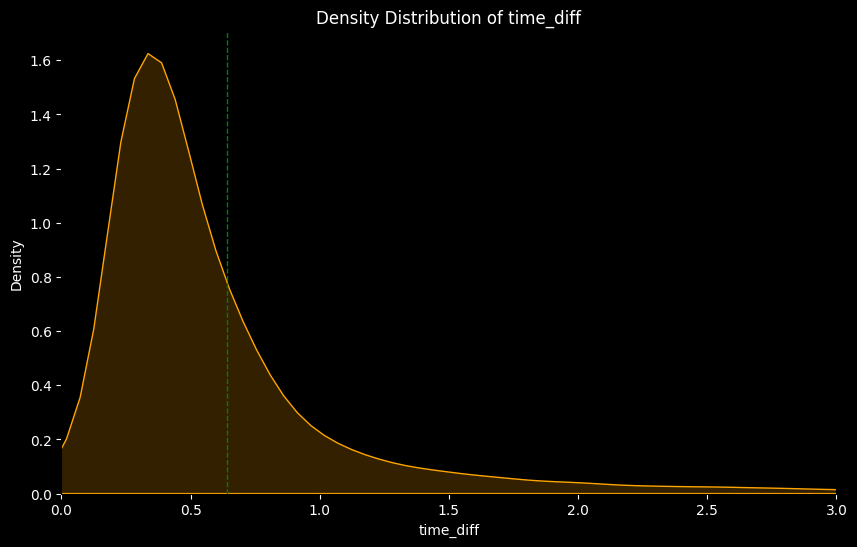

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 밀도 분포 그리기
plt.figure(figsize=(10, 6))
sns.kdeplot(item_check['time_diff'], color='orange', fill=True, alpha=0.2, label='time_diff')

# plt.axvline(ving_ming, color='red', linestyle='dashed', linewidth=1, label='ving_ming')
plt.axvline(wak_speed, color='green', linestyle='dashed', linewidth=1, label='wak')

# 축 및 레이블 설정
plt.xlabel('time_diff', color='white')
plt.ylabel('Density', color='white')
plt.title('Density Distribution of time_diff', color='white')

# 눈금 및 눈금 레이블 색상 변경
plt.tick_params(colors='white', which='both')  # x, y축의 눈금 색상 모두 변경

# X축 범위 설정
plt.xlim(0, 3)
plt.xticks(np.arange(0, 3.5, 0.5))  # 0.5초 간격으로 x축 눈금 설정

# 배경색 설정
ax = plt.gca()
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# 그래프 표시
# plt.grid(True)
plt.show()


# wak data (kill,damage,groggy)

램이 딸린다.. 필요한 로그만 저장해놓자.

In [ ]:
url = '/content/drive/MyDrive/PUBG/player_df_0711.csv'
df = load_csv_in_chunks(url)

<ipython-input-1-d5be14749058>:118: DtypeWarning: Columns (0,4,17,18,26,38,39,42,44,45,46,47,48,49,50,51,52,53,54,56,57,58,60,61,62,69,70,71,72,74,75,76,104,106,110,112,113,114,115,117,118,119,120,121,123,124,132,133,134,135,136,137,138,140,143,144,146,147,148,165,166,167,168,169,170,171,172,174,175,183,184,185,186,187,188,189,190,191,192,193,195,196,204,205,206,207,208,209,210,211,212,213,214,216,218,223,227,229,230,231,239,240,241,242,243,244,245,248,249,253,254,255,263,264,265,267,268,269,270,278,279,280,282,283,284,285,286) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat(chunks)
<ipython-input-1-d5be14749058>:118: DtypeWarning: Columns (0,4,42,44,45,47,48,49,50,51,52,53,54,56,57,58,60,61,62,69,70,71,104,106,110,112,113,114,115,117,118,119,120,121,123,124,132,133,134,137,138,140,143,144,146,147,148,165,166,167,168,169,170,171,172,174,175,183,184,185,188,189,190,191,192,193,195,196,204,205,206,209,210,211,212,213,214,216,218,223,227,229,23

In [ ]:
# 노말 게임은 제외
df = df[df['GameMode'] != 'normal-solo']


GameMode
squad    1445835
Name: count, dtype: int64

In [ ]:
# 특정 플레이어 로그 보기
kill_df = df[df['_T'].isin(['LogPlayerKillV2','LogPlayerAttack','LogPlayerTakeDamage','LogPlayerMakeGroggy'])] # 'LogPlayerKillV2','LogPlayerAttack',,'LogItemDrop','LogItemDetach','LogItemAttach','LogItemEquip','LogItemPickup'
cols =             ['matchId','_D','_T',
                  'character.name','character.health','healAmount','weaponId','damageCauserName', # healLog와 관련된 컬럼item.itemId weapon.itemId weaponId isCustomGame gameState.numParticipatedPlayers distance damageCauserName damageReason
                  'attacker.name','attackType','attacker.health','attacker.location.x', 'attacker.location.y','attacker.location.z','damageTypeCategory','damage','weapon.itemId','weapon.stackCount','fireWeaponStackCount', # 공격 하나하나 관련된 로그 (당시 공격한 위치는 나오지 않음, 맞은 경우 나옴)
                  'victim.name','damageReason','victimWeapon','victim.health','victim.location.x', 'victim.location.y','victim.location.z','victimWeaponAdditionalInfo','assists_AccountId','victimGameResult.stats.statTrakDataPairs','victimGameResult.stats.headshotStatTrakDataPairs' ,# 피해를 받은 유저
                  'dBNOMaker.name','dBNODamageInfo.damageReason','dBNODamageInfo.damageTypeCategory','dBNODamageInfo.damageCauserName','dBNODamageInfo.additionalInfo','dBNODamageInfo.distance', # 기절을 만든 유저
                  'finisher.name','finisher.health','finishDamageInfo.damageReason','finishDamageInfo.damageTypeCategory','finishDamageInfo.damageCauserName','finishDamageInfo.additionalInfo','finishDamageInfo.distance', # 마무리 유저?
                  'killer.name','killer.health','killerDamageInfo.damageReason','killerDamageInfo.damageTypeCategory','killerDamageInfo.damageCauserName','killerDamageInfo.additionalInfo',
                  'killer.location.x', 'killer.location.y','killer.location.z','killerDamageInfo.distance',
                  ] # 킬러 유저?

kill_df = kill_df[cols]


damage_gun_df = kill_df[
    ((kill_df['_T'] == 'LogPlayerAttack') & (kill_df['attackType'] == 'Weapon') & (kill_df['weapon.itemId'] != 'Item_Weapon_Apple_C') & (kill_df['weapon.itemId'].notna())) |
    ((kill_df['_T'] == 'LogPlayerTakeDamage') & (kill_df['damageTypeCategory'] == 'Damage_Gun')) |
    ((kill_df['_T'] == 'LogPlayerKillV2') & (kill_df['killerDamageInfo.damageTypeCategory'] == 'Damage_Gun')) |
    ((kill_df['_T'] == 'LogPlayerMakeGroggy') & (kill_df['damageTypeCategory'] == 'Damage_Gun')) # monster_bear
]

player_name = 'wakgood'
cols =  (damage_gun_df['attacker.name'] == player_name) | (damage_gun_df['killer.name'] == player_name) | (damage_gun_df['finisher.name'] == player_name) #| (damage_gun_df['victim.name'] == player_name)
player_df = damage_gun_df[cols]


In [ ]:
# 매핑 함수 정의
def map_weapon_id(row):
    if not pd.isna(row['damageCauserName']) and row['damageCauserName'] in mapping.values():
        for key, value in mapping.items():
            if value == row['damageCauserName']:
                return key
    else:
        return row['weapon.itemId']

# weapon.itemId 열에 매핑된 값을 추가
damage_gun_df['weapon.itemId'] = damage_gun_df.apply(map_weapon_id, axis=1)

<ipython-input-15-4eeefa3ecad7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_gun_df['weapon.itemId'] = damage_gun_df.apply(map_weapon_id, axis=1)


In [ ]:

# 거리 계산을 위한 데이터만 선택
coords = damage_gun_df[['attacker.location.x', 'attacker.location.y', 'attacker.location.z',
                        'victim.location.x', 'victim.location.y', 'victim.location.z']] #  'killer.location.x', 'killer.location.y', 'killer.location.z'

# NaN 값이 있는 행 건너뛰고 거리 계산하여 'distance' 열에 추가
damage_gun_df['distance'] = damage_gun_df.apply(lambda row:
                                                euclidean((row['attacker.location.x'], row['attacker.location.y'], row['attacker.location.z']),
                                                          (row['victim.location.x'], row['victim.location.y'], row['victim.location.z'])) / 100
                                                if not row[['attacker.location.x', 'attacker.location.y', 'attacker.location.z',
                                                            'victim.location.x', 'victim.location.y', 'victim.location.z']].isnull().any()
                                                else float('NaN'),
                                                axis=1)

# NaN 값이 있는 행 건너뛰고 killerDamageInfo.distance 값이 음수인 경우에만 거리 계산하여 'kill_distance' 열에 추가
damage_gun_df['killerDamageInfo.distance'] = damage_gun_df['killerDamageInfo.distance'] / 100

<ipython-input-16-e58f05c59333>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_gun_df['distance'] = damage_gun_df.apply(lambda row:
<ipython-input-16-e58f05c59333>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_gun_df['killerDamageInfo.distance'] = damage_gun_df['killerDamageInfo.distance'] / 100


In [ ]:
len(damage_gun_df[damage_gun_df.duplicated(keep=False)])

1067

In [ ]:
damage_gun_df

In [ ]:
print(damage_gun_df['_D'].min())
print(damage_gun_df['_D'].max())

2024-07-05T15:45:50.272Z
2024-07-08T18:14:46.444Z


In [ ]:
# player_df.head(200)
# match_datas 저장
csv_file_path = '/content/drive/MyDrive/PUBG/damage_log_data_all(0711).csv'
damage_gun_df.to_csv(csv_file_path, index=False)

# 무기별 정확도 및 데미지

* AR과 SR 를 다르게 봐야한다.


In [ ]:
# 우왁굳님의 kill,damage 로그만 가져오겠습니다.
url1 = '/content/drive/MyDrive/PUBG/damage_log_data_all(06).csv'
url2 = '/content/drive/MyDrive/PUBG/damage_log_data_all(07).csv'
url3 = '/content/drive/MyDrive/PUBG/damage_log_data_all(0705).csv'
url4 = '/content/drive/MyDrive/PUBG/damage_log_data_all(0711).csv'

df = load_csv_in_chunks(url1)
df2 = load_csv_in_chunks(url2)
df3 = load_csv_in_chunks(url3)
df4 = load_csv_in_chunks(url4)

<ipython-input-4-d5be14749058>:118: DtypeWarning: Columns (30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat(chunks)


In [ ]:
all_df = pd.concat([df,df2,df3])


In [ ]:
# prompt: all_df 의 중복행 을 가져와

duplicates = all_df[all_df.duplicated(keep=False)]
duplicates[duplicates['attacker.name'] == 'wakgood']

In [ ]:
# prompt: all_df 의중복행 제거해줘
# 샷건의경우 중복행이 생김 어쩔 수 없다.

all_df = all_df.drop_duplicates(keep=False)


In [ ]:

print(all_df['_D'].min())
print(all_df['_D'].max())

2024-06-13T16:54:43.536Z
2024-07-10T15:56:39.811Z


In [ ]:
WAK_match = ['7cf8ef7e-d6af-4f49-b21d-a0f989f87021',
 'e596fe45-b5b3-47e4-877b-8c41cdcae3a4',
 '3212089f-4a7f-4657-ac3b-7c4a97a54b09']
all_df = all_df[~all_df['matchId'].isin(WAK_match)]

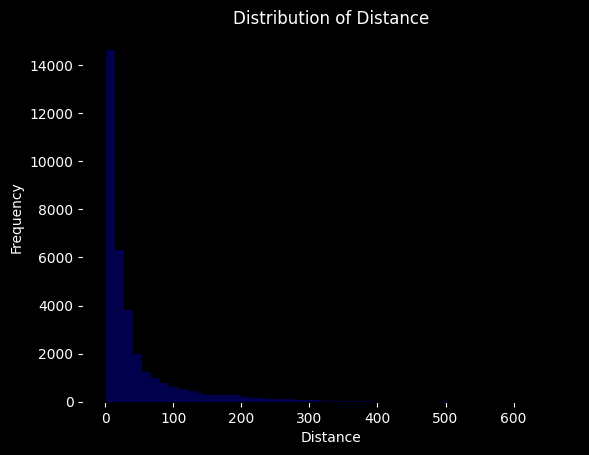

In [ ]:
import matplotlib.pyplot as plt

distance = df[df['distance'] < 5000]

# 히스토그램 그리기
plt.hist(distance['distance'], bins=50, alpha=0.3, color='blue')

# 축 및 레이블 설정
plt.xlabel('Distance', color='white')
plt.ylabel('Frequency', color='white')
plt.title('Distribution of Distance', color='white')

# 눈금 및 눈금 레이블 색상 변경
plt.tick_params(colors='white', which='both')  # x, y축의 눈금 색상 모두 변경

# plt.grid(True)  # 그리드를 켜려면 주석을 해제하세요
# 배경색 설정
ax = plt.gca()
ax.set_facecolor('black')  # 축 배경색 회색으로 설정
plt.gcf().set_facecolor('black')  # 그림 배경색 회색으로 설정

# plt.grid(True)  # 그리드를 켜려면 주석을 해제하세요
plt.show()

In [ ]:
all_df[['matchId']].nunique()

matchId    85
dtype: int64

In [ ]:
# prompt: all_df['finishDamageInfo.additionalInfo'] 값들을 import ast 해줘

import ast

all_df['finishDamageInfo.additionalInfo'] = all_df['finishDamageInfo.additionalInfo'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [ ]:
all_df[all_df['_T']=='LogPlayerMakeGroggy'].sample(199)

In [ ]:
# prompt: player_df 중복행 제거
all_df.drop_duplicates(inplace=True)


In [ ]:
list_match = all_df['matchId'].unique().tolist()
# ids = [id for id in matchids if id not in list_match]

len(list_match)

124

In [ ]:
# damageReason 값을 더미 변수로 변환, 컬럼으로 피봇하여 여부확인
damage_dummies = pd.get_dummies(all_df['damageReason'])
result_df = pd.concat([all_df, damage_dummies], axis=1)

In [ ]:
result_df.head(100)

In [ ]:

attack_col = ['_D','_T','attacker.name','weapon.itemId','fireWeaponStackCount']
dmg_col = ['_D','_T','damageCauserName','attacker.name', 'damageTypeCategory','damage','weapon.itemId','ArmShot',	'HeadShot',	'LegShot',	'PelvisShot',	'TorsoShot','distance','victim.name'] # NonSpecific'

# 모든 유저에 위 과정을 적용 시키면
# 초단위를 제외한 시간값 추가
result_df['_D'] = pd.to_datetime(result_df['_D']) #.dt.strftime('%Y-%m-%dT%H:%M:%S')

weapon_shot = result_df[result_df['_T'] == 'LogPlayerAttack'][attack_col]
weapon_shot = weapon_shot.groupby(['attacker.name',pd.Grouper(key='_D', freq='5S'),'weapon.itemId']).agg(
    shot = pd.NamedAgg(column='_T',aggfunc='count')
).reset_index()


weapon_hit = result_df[result_df['_T'] == 'LogPlayerTakeDamage'][dmg_col]
weapon_hit = weapon_hit.groupby(['attacker.name',pd.Grouper(key='_D', freq='5S'),'weapon.itemId','victim.name']).agg(
    hit = pd.NamedAgg(column='_T',aggfunc='count'),
    distanceMean = pd.NamedAgg(column='distance',aggfunc='mean'),
    ArmShot = pd.NamedAgg(column='ArmShot',aggfunc='sum'),
    HeadShot = pd.NamedAgg(column='HeadShot',aggfunc='sum'),
    LegShot = pd.NamedAgg(column='LegShot',aggfunc='sum'),
    PelvisShot = pd.NamedAgg(column='PelvisShot',aggfunc='sum'),
    TorsoShot = pd.NamedAgg(column='TorsoShot',aggfunc='sum'),
    # NonSpecific = pd.NamedAgg(column='NonSpecific', aggfunc='sum'),
    damage = pd.NamedAgg(column='damage',aggfunc='sum')
).reset_index()

# shot을 기준으로 merge 해야한다.
merged_df = pd.merge(weapon_shot, weapon_hit,
                    left_on=['attacker.name', '_D','weapon.itemId'],
                    right_on=['attacker.name', '_D','weapon.itemId'],
                    how='left')


In [ ]:
merged_df[['hit','ArmShot','HeadShot',	'LegShot',	'PelvisShot',	'TorsoShot','damage']] = merged_df[['hit','ArmShot','HeadShot',	'LegShot',	'PelvisShot',	'TorsoShot','damage']].fillna(0).astype(int)

# 총기 장르 추가
merged_df['weapon.genre'] = [
    'AR' if item in AR else
    'DMR' if item in DMR else
    'SR' if item in SR else
    'SG' if item in SG else
    'SMG' if item in SMG else
    'LMG' if item in LMG else
    'Special' if item in Special else
    'Unknown'
    for item in merged_df['weapon.itemId']
]
# 정확도 계산
col = ['weapon.genre','weapon.itemId','shot','hit','distanceMean','distance_category','ratio']
merged_df['ratio'] = merged_df['hit']*100 / merged_df['shot']
merged_df['miss'] = merged_df['shot'] - merged_df['hit']
merged_df[['ratio','distanceMean']] = merged_df[['ratio','distanceMean']].fillna(0).astype(int)


In [ ]:
print(merged_df['_D'].min())
print(merged_df['_D'].max())

2024-06-13 16:54:40+00:00
2024-07-10 15:56:35+00:00


In [ ]:
mer

In [ ]:
# # match_datas 저장
# csv_file_path = '/content/drive/MyDrive/PUBG/wak_gun_static06.csv'
# merged_df.to_csv(csv_file_path, index=False)

In [ ]:
test=merged_df.groupby(['weapon.itemId']).agg(
    shot = pd.NamedAgg(column='shot',aggfunc='sum'),
    hit = pd.NamedAgg(column='hit',aggfunc='sum'),
)

test.sort_values(by=['shot'],ascending=False)

### content1. 최애의 무기는? ABOUT AR

In [ ]:
# AR 기준
# 범주형 컬럼 생성
bins = [i for i in range(0, 50, 10)] + [float('inf')]
labels = [f'{i}~{i+10}' for i in range(0, 40, 10)] + ['40 이상']
# 범주형 컬럼 생성
merged_df['distance_category'] = pd.cut(merged_df['distanceMean'], bins=bins, labels=labels, right=False)

In [ ]:


# 5초동안 shot을 10번이상한 경우
AR_df = merged_df[
    (merged_df['distanceMean'] > 0) &
    (merged_df['distanceMean'] < 300) &
    (merged_df['shot'] > 9) &
    (merged_df['weapon.genre'] =='AR') &
    (merged_df['weapon.itemId'].isin(['Item_Weapon_HK416_C','Item_Weapon_AUG_C','Item_Weapon_ACE32_C']))
    ]# [col] #shot_1000m #


player = merged_df[merged_df['attacker.name'] == 'wakgood']
player_AR = player[
    (player['distanceMean'] > 0) &
    (player['distanceMean'] < 300) &
    (player['shot'] > 9) &
    (player['weapon.genre'] =='AR') &
    (player['weapon.itemId'].isin(['Item_Weapon_HK416_C','Item_Weapon_AUG_C','Item_Weapon_ACE32_C']))
    ]


In [ ]:
len(player_AR)

58

In [ ]:

# 범주형 컬럼 생성
bins = [0, 30] + [i for i in range(40, 110, 10)] + [float('inf')]
labels =  ['30 미만'] + [f'{i}~{i+10}' for i in range(30, 100, 10)] + ['100 이상']

player_sr = player[
    (player['hit'] > 0) &
    (player['distanceMean'] < 1000) &
    (player['weapon.genre'] =='DMR')
    ]

player_sr['distance_category'] = pd.cut(player_sr['distanceMean'], bins=bins, labels=labels, right=False)
player_sr

In [ ]:
# 1초동안 5번이상 SHOT했을때, 총기들의 거리별 정확도
AR_hit_df = AR_df.groupby(['weapon.itemId','distance_category']).agg(

                        HeadShot = pd.NamedAgg(column='HeadShot', aggfunc='sum'),
                        ArmShot = pd.NamedAgg(column='ArmShot', aggfunc='sum'),
                        LegShot = pd.NamedAgg(column='LegShot', aggfunc='sum'),
                        PelvisShot = pd.NamedAgg(column='PelvisShot', aggfunc='sum'),
                        TorsoShot = pd.NamedAgg(column='TorsoShot', aggfunc='sum'),
                        shot = pd.NamedAgg(column='shot',aggfunc='sum'),
                        hit = pd.NamedAgg(column='hit',aggfunc='sum'),
                        ratio = pd.NamedAgg(column='ratio', aggfunc='mean'),

                        ).reset_index()
# 1초동안 5번이상 SHOT했을때, 총기들의 거리별 정확도
player_AR_hit_df = player_AR.groupby(['weapon.itemId','distance_category']).agg(

                        HeadShot = pd.NamedAgg(column='HeadShot', aggfunc='sum'),
                        ArmShot = pd.NamedAgg(column='ArmShot', aggfunc='sum'),
                        LegShot = pd.NamedAgg(column='LegShot', aggfunc='sum'),
                        PelvisShot = pd.NamedAgg(column='PelvisShot', aggfunc='sum'),
                        TorsoShot = pd.NamedAgg(column='TorsoShot', aggfunc='sum'),
                        shot = pd.NamedAgg(column='shot',aggfunc='sum'),
                        hit = pd.NamedAgg(column='hit',aggfunc='sum'),
                        ratio = pd.NamedAgg(column='ratio', aggfunc='mean'),

                        ).reset_index()

In [ ]:
player_AR_hit_df

weapon.itemId distance_category  HeadShot  ArmShot  LegShot  \
0   Item_Weapon_ACE32_C              0~10         2        3        0   
1   Item_Weapon_ACE32_C             10~20         3        3        8   
2   Item_Weapon_ACE32_C             20~30         1        3       16   
3   Item_Weapon_ACE32_C             30~40         0        5        7   
4   Item_Weapon_ACE32_C             40 이상         1        1        4   
5     Item_Weapon_AUG_C              0~10         0        1        0   
6     Item_Weapon_AUG_C             10~20         6        7       11   
7     Item_Weapon_AUG_C             20~30         7        8       18   
8     Item_Weapon_AUG_C             30~40         1        3        5   
9     Item_Weapon_AUG_C             40 이상         2        3        7   
10  Item_Weapon_HK416_C              0~10         6       10        4   
11  Item_Weapon_HK416_C             10~20         1        7       10   
12  Item_Weapon_HK416_C             20~30         7        1        5   
13  Item_Weapon_HK416_C             30~40         0        0        0   
14  Item_Weapon_HK416_C             40 이상         0        1        4   

    PelvisShot  TorsoShot  shot  hit      ratio  
0            1         15    45   21  35.000000  
1            2         16   112   32  26.857143  
2            4         17   206   41  20.250000  
3            7         17   108   36  31.333333  
4            2          1    54    9  16.000000  
5            0          4    16    5  31.000000  
6            3         30   193   57  34.800000  
7            6         40   276   79  28.800000  
8            4         18   166   31  18.222222  
9            0          8   135   20  17.666667  
10           5         31   213   56  27.363636  
11           4         17   107   39  36.500000  
12           0          8   156   21  16.500000  
13           0          0     0    0        NaN  
14           1          8    87   14  14.400000

In [ ]:
# prompt: AR_hit_df 를 pivot 해줘 weapon.itemId 컬럼을 컬럼으로, 행은 distance_category , 값은 ratio

pivot = player_AR_hit_df.pivot_table(index='distance_category', columns='weapon.itemId', values='ratio')
pivot


weapon.itemId      Item_Weapon_ACE32_C  Item_Weapon_AUG_C  Item_Weapon_HK416_C
distance_category                                                             
0~10                         39.333333          33.200000            27.583333
10~20                        27.090909          30.500000            34.375000
20~30                        17.117647          27.882353            17.900000
30~40                        27.000000          16.700000            12.500000
40 이상                        11.300000          17.666667            14.000000

# 탄착군 형성


In [ ]:
import random

# 부위별 좌표 랜덤생성

hit_locations = {
    'HeadShot': [(40, 75, 240, 280)],
    'TorsoShot':[(30, 85, 175, 240)] ,
    'ArmShot': [(0,30,230,140),(90,120,230,140)],
    'PelvisShot': [(30,90,150,175)],
    'LegShot': [(30,90,10, 150)],
    'miss' : [(0, 20, 10, 120),
        (95, 120, 10, 120),
        (80, 120, 250, 300),
        (0, 40, 250, 300),
        ]

}
def generate_random_coordinates(hit_location_ranges):
    x1, x2, y1, y2 = hit_location_ranges
    x = random.uniform(x1, x2)
    y = random.uniform(y1, y2)
    return {'x': x, 'y': y}

def calculate_coordinates(row):
    coordinates = []
    for hit_type, ranges in hit_locations.items():
        num_hits = row[hit_type]
        for _ in range(num_hits):
            range_tuple = random.choice(ranges)  # 여러 범위 중 무작위로 하나 선택
            coord = generate_random_coordinates(range_tuple)
            coordinates.append(coord)
    return coordinates

# Apply calculate_coordinates function to each row in the DataFrame
AR_df['hit_coordinates'] = AR_df.apply(calculate_coordinates, axis=1)

<ipython-input-18-7be733f492e7>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AR_df['hit_coordinates'] = AR_df.apply(calculate_coordinates, axis=1)


In [ ]:
AR_df.head()

attacker.name                        _D        weapon.itemId  shot  \
35        001jqr 2024-06-28 14:33:05+00:00  Item_Weapon_ACE32_C    23   
40        001jqr 2024-06-28 14:34:15+00:00  Item_Weapon_ACE32_C    14   
70   007haogegeg 2024-06-20 18:01:30+00:00  Item_Weapon_HK416_C    22   
71   007haogegeg 2024-06-20 18:01:30+00:00  Item_Weapon_HK416_C    22   
72   007haogegeg 2024-06-20 18:01:55+00:00  Item_Weapon_HK416_C    16   

    victim.name  hit  distanceMean  ArmShot  HeadShot  LegShot  PelvisShot  \
35    AkepNrmSR    8             4        0         1        1           0   
40    AkepNrmSR    3             8        1         0        0           0   
70  ludatiancai    5            54        2         0        1           1   
71    ssseessss    4            32        0         0        3           0   
72    ssseessss    3            25        0         1        0           0   

    TorsoShot  damage weapon.genre  ratio  miss distance_category  \
35          6      99           AR     34    15              0~10   
40          2      79           AR     21    11              0~10   
70          1      74           AR     22    17             40 이상   
71          1      80           AR     18    18             30~40   
72          2      78           AR     18    13             20~30   

                                      hit_coordinates  
35  [{'x': 65.57308273477773, 'y': 249.17612248458...  
40  [{'x': 45.7308720539758, 'y': 177.767775831607...  
70  [{'x': 82.8585444129827, 'y': 210.574205363894...  
71  [{'x': 57.23315515844307, 'y': 207.03702950696...  
72  [{'x': 68.39167462305937, 'y': 242.52441701527...

In [ ]:
# 랜덤 생성된 좌표들의 차이를 구한다음 평균을 구한다. -> 반동지표

def calculate_recoil(row):
    recoil_values = []
    prev_x = None
    prev_y = None
    for coord in row['hit_coordinates']:
        x = coord['x']
        y = coord['y']
        if prev_x is not None and prev_y is not None:
            # Calculate Euclidean distance between consecutive shots
            recoil = np.sqrt((x - prev_x)**2 + (y - prev_y)**2)
            recoil_values.append(recoil)
        prev_x = x
        prev_y = y
    # Return mean recoil value
    if recoil_values:
        return np.mean(recoil_values)
    else:
        return np.nan

    return recoil_values

AR_df['recoil'] = AR_df.apply(calculate_recoil, axis=1)


<ipython-input-20-54b5f36b37f5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AR_df['recoil'] = AR_df.apply(calculate_recoil, axis=1)


In [ ]:
AR_df.head()

<ipython-input-51-c70d8325c380>:27: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc = ax.scatter(x_data, y_data, alpha=1, s=15, edgecolors='none',marker='x')


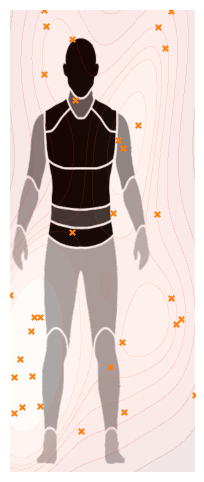

In [ ]:
import seaborn as sns
# 지도 이미지 추가
map_path = "/content/hitbox.png"
img = Image.open(map_path)

def death_spot2(df):
    x_data = []
    y_data = []
    for coords_list in df['hit_coordinates']:
        for coord in coords_list:
            x_data.append(coord['x'])
            y_data.append(coord['y'])

    # 그래프 그리기
    fig, ax = plt.subplots(figsize=(6, 6))
    # Set x and y limits
    ax.set_xlim([0, 120])
    ax.set_ylim([0, 300])
    plt.axis('off')

    ax.imshow(img, extent=[0, 120, 0, 300])  # Uncomment this line if you have an image to overlay

    # Seaborn의 kdeplot으로 음영 추가
    sns.kdeplot(x=x_data, y=y_data, shade=True, cmap='Reds_r', ax=ax, alpha=0.1)

    # matploltlib 산점도로 표시
    sc = ax.scatter(x_data, y_data, alpha=1, s=15, edgecolors='none',marker='x')

    plt.show()

# player.head(1)
# 함수 호출
death_spot2(player.head(2))

In [ ]:
player[player['distanceMean'] < 10 ].groupby(['weapon.itemId']).agg(
    recoil = pd.NamedAgg(column='recoil',aggfunc='mean')
)

recoil
weapon.itemId                  
Item_Weapon_ACE32_C   90.559057
Item_Weapon_AUG_C    126.380084
Item_Weapon_HK416_C  117.993516

### 총기별 반동 지표 분포

In [ ]:
player = AR_df[AR_df['attacker.name'] =='wakgood']
player_aug = player[(player['weapon.itemId'] == 'Item_Weapon_AUG_C') & (player['distanceMean']<20)][['recoil']].mean()
player_aug

recoil    110.915225
dtype: float64

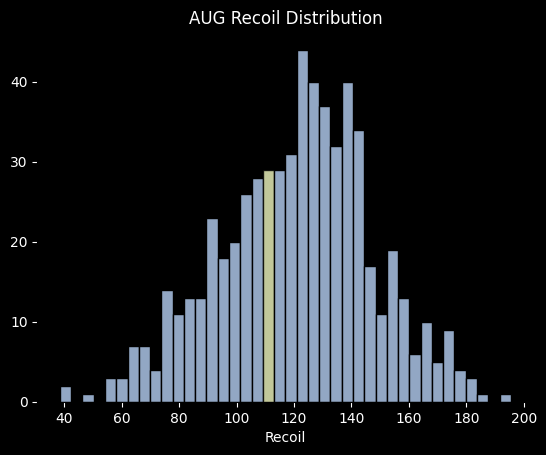

In [ ]:
import matplotlib.pyplot as plt

# 20m 미만 + 어그
aug = AR_df[(AR_df['weapon.itemId'] == 'Item_Weapon_AUG_C') & (AR_df['distanceMean'] < 20)]
player_aug = player[(player['weapon.itemId'] == 'Item_Weapon_AUG_C') & (player['distanceMean'] < 20)][['recoil']].mean()

# sns.histplot(aug['recoil'], bins=40, kde=True, color='blue', edgecolor='white', label='aug', alpha=0.3)

# 전체 히스토그램 그리기
counts, bins, patches = plt.hist(aug['recoil'], bins=40, alpha=1, color='#92A7C4', edgecolor='black', label='aug')
# player_aug_mean 부분 색상 변경
for patch, left, right in zip(patches, bins[:-1], bins[1:]):
    if left <= player_aug['recoil'] < right:
        patch.set_facecolor('#F4FBC2')
        patch.set_alpha(0.8)


# 축 및 레이블 설정
plt.xlabel('Recoil', color='white')
plt.title('AUG Recoil Distribution', color='white')

# 눈금 및 눈금 레이블 색상 변경
plt.tick_params(colors='white', which='both')  # x, y축의 눈금 색상 모두 변경
# plt.grid(True)  # 그리드를 켜려면 주석을 해제하세요

# 배경색 설정
ax = plt.gca()
ax.set_facecolor('black')  # 축 배경색 회색으로 설정
plt.gcf().set_facecolor('black')  # 그림 배경색 회색으로 설정

plt.show()

In [ ]:
aug = player[(player['weapon.itemId'] == 'Item_Weapon_AUG_C') & (player['distanceMean'] < 16)]['recoil'].mean().round()
ace = player[(player['weapon.itemId'] == 'Item_Weapon_ACE32_C') & (player['distanceMean'] < 16)]['recoil'].mean().round()
m4 = player[(player['weapon.itemId'] == 'Item_Weapon_HK416_C') & (player['distanceMean'] < 16)]['recoil'].mean().round()

print(aug)
print(ace)
print(m4)


119.0
119.0
114.0


# 생존력과 관련된 지표


# 운과 생존력에 관련된 지표
* 풀파밍이 완성되는 시간 (무기 + 풀파츠 + 드링크, 치유템 3개 이상)  
* 3렙 가방, 3렙 조끼, 보급 item 획득 횟수
* 자기장 위치
* 고지대에 적이 있는 경우

In [ ]:
wak1 = '/content/drive/MyDrive/PUBG/player_df_07.csv'
wak2 = '/content/drive/MyDrive/PUBG/player_df_0705.csv'
wak3 = '/content/drive/MyDrive/PUBG/player_df_06.csv'

df = load_csv_in_chunks(wak3)

NameError: name 'load_csv_in_chunks' is not defined

## 파츠에 관련된 운

In [ ]:
df['matchId'].unique()

In [ ]:
sample = df[df['matchId'] == 'b1b37930-f734-429b-8a01-38fe0d6ddda2']
farming = sample[sample['_T'].isin(['LogItemDrop','LogItemDetach','LogItemAttach','LogItemEquip','LogItemPickup'])][farming_col]
attack = sample[sample['_T'].isin(['LogPlayerKillV2','LogPlayerAttack','LogPlayerTakeDamage','LogPlayerMakeGroggy'])]


NameError: name 'df' is not defined

In [ ]:
# prompt: weapon.itemId	weapon.stackCount	weapon.category	weapon.subCategory	weapon.attachedItems	isLedgeGrab	objectType	objectTypeStatus	objectTypeAdditionalInfo  위컬럼이 nan 이 아닌 경우를 가져와줘 'or'

result = sample[sample['parentItem.stackCount'].notna() | sample['childItem.stackCount'].notna() ] #| sample['weapon.category'].notna() | sample['weapon.subCategory'].notna() | sample['weapon.attachedItems'].notna() | sample['isLedgeGrab'].notna() | sample['objectType'].notna() | sample['objectTypeStatus'].notna() | sample['objectTypeAdditionalInfo'].notna()]


item을 attach 하고 detach 할 때, 장착 정보가 나온다!!

In [ ]:
attach_col = ['_D', '_T','matchId','character.name', "item.itemId"	,"item.stackCount",	"item.category",
              'parentItem.itemId',  'parentItem.category', 'parentItem.subCategory', 'parentItem.attachedItems','childItem.itemId']
              # 'childItem.itemId', 'childItem.stackCount', 'childItem.category', 'childItem.subCategory', 'childItem.attachedItems']


Use
> 아래의 치유 아이템이 2개 이상인 경우 파밍완료

* Item_Heal_FirstAid_C : 구급상자
* Item_Boost_PainKiller_C : 진통제
* Item_Boost_EnergyDrink_C : 에너지드링크
* Item_Weapon_FlashBang_C : 섬광
* Item_Weapon_SmokeBomb_C : 연막탄

In [ ]:
pickup = sample[sample['_T'].isin(['LogItemPickup']) & (sample['character.name'] == 'wakgood')][attach_col]
pickup['item.itemId'] = pickup['item.itemId'].map(attach_mapping).fillna(pickup['item.itemId'])
test = pickup[pickup['item.category'] =='Attachment']


# 총기 장르 추가
test['attach.genre'] = [
    'Upper' if item in Upper else
    'Muzzle' if item in Muzzle else
    'Magazine' if item in Magazine else
    'SideRail' if item in SideRail else
    'Lower' if item in Lower else
    'Stock' if item in Stock else
    'Unknown'
    for item in test[test['item.category'] == 'Attachment']['item.itemId']
]

# attach.groupby(['item.itemId','item.category']).agg({'item.stackCount':'sum','_D':'max'})

Attach

* AR 의 parentItem.attachedItems 파츠가 4개 이상인 경우 파밍완료
* SR 의 파츠가 3개 이상인 경우 파밍완료

In [ ]:
attach = sample[sample['_T'].isin(['LogItemAttach']) & (sample['character.name'] == 'wakgood')][attach_col]
attach['parentItem.attachedItems'] = attach['parentItem.attachedItems'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
attach['parentItem.attachedItems'] = attach['parentItem.attachedItems'].apply(lambda x: [attach_mapping[item] if item in attach_mapping else item for item in x])
attach['childItem.itemId'] = attach['childItem.itemId'].map(attach_mapping).fillna(attach['childItem.itemId'])
attach['parentItem.cnt'] = attach['parentItem.attachedItems'].apply(lambda x: len(x))
attach

정리
* farming_df 아이템을 줍고, 장착한 데이터
* LogItemPickup - 사용 아이템 집계
* LogItemAttach - weapon 과 파츠 아이템 집계


attach 테이블과 pickup 테이블을 각 경기와 유저별로 집계하고 합쳐줄까?

In [ ]:
farm_df = farming_df[farming_df['_T'].isin(['LogItemPickup','LogItemAttach'])]
farm_df['_D'] = pd.to_datetime(farm_df['_D'])
farm_df['parentItem.attachedItems'] = farm_df['parentItem.attachedItems'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

farm_df['parentItem.cnt'] = farm_df['parentItem.attachedItems'].apply(lambda x: len(x) if (isinstance(x, list) or isinstance(x, tuple)) else 0)
farm_df['childItem.cnt'] = farm_df['childItem.itemId'].apply(lambda x: 1 if (isinstance(x, str)) else 0)

farm_df['attach_cnt'] = farm_df['parentItem.cnt'] + farm_df['childItem.cnt']

attach = farm_df[(farm_df['_T'] == 'LogItemAttach')]
pickup = farm_df[(farm_df['_T'] == 'LogItemPickup')]

<ipython-input-200-e480721bb50a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_df['_D'] = pd.to_datetime(farm_df['_D'])
<ipython-input-200-e480721bb50a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_df['parentItem.attachedItems'] = farm_df['parentItem.attachedItems'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
<ipython-input-200-e480721bb50a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [ ]:
farm_df[(farm_df['character.name'] == 'lll-lll--') & (farm_df['parentItem.category'] == 'Weapon')].head(100)[['_D','_T','character.name','parentItem.itemId','parentItem.attachedItems','childItem.itemId','childItem.category','parentItem.cnt','childItem.cnt',	'attach_cnt']]

_D             _T character.name  \
316215 2024-06-19 18:28:05.490000+00:00  LogItemAttach      lll-lll--   
316274 2024-06-19 18:28:07.548000+00:00  LogItemAttach      lll-lll--   
317000 2024-06-19 18:28:25.626000+00:00  LogItemAttach      lll-lll--   
317015 2024-06-19 18:28:26.035000+00:00  LogItemAttach      lll-lll--   
318267 2024-06-19 18:29:00.030000+00:00  LogItemAttach      lll-lll--   
318314 2024-06-19 18:29:01.397000+00:00  LogItemAttach      lll-lll--   
318590 2024-06-19 18:29:09.331000+00:00  LogItemAttach      lll-lll--   
319007 2024-06-19 18:29:24.771000+00:00  LogItemAttach      lll-lll--   
319035 2024-06-19 18:29:25.917000+00:00  LogItemAttach      lll-lll--   
319040 2024-06-19 18:29:26.198000+00:00  LogItemAttach      lll-lll--   
319339 2024-06-19 18:29:36.703000+00:00  LogItemAttach      lll-lll--   
319340 2024-06-19 18:29:36.703000+00:00  LogItemAttach      lll-lll--   
319341 2024-06-19 18:29:36.703000+00:00  LogItemAttach      lll-lll--   
319342 2024-06-19 18:29:36.703000+00:00  LogItemAttach      lll-lll--   
319384 2024-06-19 18:29:39.264000+00:00  LogItemAttach      lll-lll--   
319385 2024-06-19 18:29:39.264000+00:00  LogItemAttach      lll-lll--   
319395 2024-06-19 18:29:40.230000+00:00  LogItemAttach      lll-lll--   
319440 2024-06-19 18:29:43.784000+00:00  LogItemAttach      lll-lll--   
319556 2024-06-19 18:29:48.541000+00:00  LogItemAttach      lll-lll--   
320303 2024-06-19 18:30:22.793000+00:00  LogItemAttach      lll-lll--   
320338 2024-06-19 18:30:24.517000+00:00  LogItemAttach      lll-lll--   
320989 2024-06-19 18:30:53.851000+00:00  LogItemAttach      lll-lll--   
320990 2024-06-19 18:30:53.851000+00:00  LogItemAttach      lll-lll--   
320991 2024-06-19 18:30:53.851000+00:00  LogItemAttach      lll-lll--   
324763 2024-06-19 18:44:21.777000+00:00  LogItemAttach      lll-lll--   
325027 2024-06-19 18:47:02.131000+00:00  LogItemAttach      lll-lll--   

              parentItem.itemId  \
316215      Item_Weapon_HK416_C   
316274      Item_Weapon_HK416_C   
317000      Item_Weapon_HK416_C   
317015      Item_Weapon_HK416_C   
318267  Item_Weapon_BerylM762_C   
318314  Item_Weapon_BerylM762_C   
318590      Item_Weapon_HK416_C   
319007      Item_Weapon_HK416_C   
319035  Item_Weapon_BerylM762_C   
319040      Item_Weapon_HK416_C   
319339        Item_Weapon_SKS_C   
319340        Item_Weapon_SKS_C   
319341        Item_Weapon_SKS_C   
319342        Item_Weapon_SKS_C   
319384  Item_Weapon_BerylM762_C   
319385        Item_Weapon_SKS_C   
319395        Item_Weapon_SKS_C   
319440        Item_Weapon_SKS_C   
319556  Item_Weapon_BerylM762_C   
320303        Item_Weapon_SKS_C   
320338        Item_Weapon_SKS_C   
320989        Item_Weapon_M24_C   
320990        Item_Weapon_M24_C   
320991        Item_Weapon_M24_C   
324763  Item_Weapon_BerylM762_C   
325027        Item_Weapon_M24_C   

                                 parentItem.attachedItems  \
316215                                                 []   
316274   [Item_Attach_Weapon_Lower_LightweightForeGrip_C]   
317000  [Item_Attach_Weapon_Lower_LightweightForeGrip_...   
317015  [Item_Attach_Weapon_Lower_LightweightForeGrip_...   
318267                                                 []   
318314              [Item_Attach_Weapon_Lower_Foregrip_C]   
318590  [Item_Attach_Weapon_Lower_LightweightForeGrip_...   
319007  [Item_Attach_Weapon_Lower_LightweightForeGrip_...   
319035  [Item_Attach_Weapon_Lower_Foregrip_C, Item_Att...   
319040  [Item_Attach_Weapon_Lower_LightweightForeGrip_...   
319339                                                 []   
319340   [Item_Attach_Weapon_Lower_LightweightForeGrip_C]   
319341  [Item_Attach_Weapon_Lower_LightweightForeGrip_...   
319342  [Item_Attach_Weapon_Lower_LightweightForeGrip_...   
319384  [Item_Attach_Weapon_Lower_Foregrip_C, Item_Att...   
319385  [Item_Attach_Weapon_Lower_LightweightForeGrip_...   
319395  [Item_Attach_Weapon_Lower_LightweightForeGrip_...   
319440  [Item_Attach_

In [ ]:
# (farm_df['_T'] == 'LogItemAttach')
wak = farm_df[(farm_df['character.name'] == 'wakgood') & (farm_df['matchId'] == '17026713-c19b-4852-ac37-d5e9c2e42ea9')] # farming_df['_T'].isin(['LogItemAttach'])

# 총기 장르 추가
farm_df['weapon.genre'] = [
    'AR' if item in AR else
    'DMR' if item in DMR else
    'SR' if item in SR else
    'SG' if item in SG else
    'SMG' if item in SMG else
    'LMG' if item in LMG else
    'Special' if item in Special else
    'Unknown'
    for item in farm_df['parentItem.itemId']
]



 # [attach_col+['parentItem.cnt','weapon.genre']]

<ipython-input-204-23634a548981>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  farm_df['weapon.genre'] = [


In [ ]:
wak[wak['_T'] == 'LogItemAttach'] #[wak['matchId'] == '0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96']

In [ ]:
grouped = farm_df.groupby(['matchId','character.name'])

def farming_speed(group):
    group = group.sort_values('_D')  # 타임스탬프 기준으로 정렬
    start_t = group['_D'].min() # 아이템을 줍는 시작 시점

    AR_parts_T = group[group['attach_cnt'] == 5]['_D'].min()   # 각유저의 부착물 cnt 가 4개 이상이 완성되는 시점
    SR_DMR_parts_t = group[group['attach_cnt'] == 4]['_D'].min()   # 각유저의 부착물 cnt 가 3개 이상이 완성되는 시점

    if group['weapon.genre'].iloc[0] == 'AR':
      group = group[group['_D'] == AR_parts_T]
    elif group['weapon.genre'].iloc[0] in ['DMR', 'SR']:
      group = group[group['_D'] == SR_DMR_parts_t]

    group['time_diff'] = group['_D'] - start_t
    group['time_diff'] = group['time_diff'].dt.total_seconds()

    return group

# 각 그룹에 대해 함수 적용하여 필터링
parts_farm_T = grouped.apply(farming_speed).reset_index(drop=True)[['matchId','_D','_T','character.name','weapon.genre','item.itemId','item.category','parentItem.itemId',
                                                                     'parentItem.attachedItems','childItem.itemId','attach_cnt','time_diff']]


일단 파츠가 완성되는 시간 그래프

In [ ]:
parts_farm_T[parts_farm_T['character.name']=='wakgood'].head(100)

matchId                               _D  \
5540   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:23.695000+00:00   
5541   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:23.708000+00:00   
5542   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:23.909000+00:00   
5543   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:24.323000+00:00   
5544   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:26.639000+00:00   
5545   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:26.875000+00:00   
5546   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:27.025000+00:00   
5547   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:31.877000+00:00   
5548   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:36.152000+00:00   
5549   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:36.152000+00:00   
5550   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:51.673000+00:00   
5551   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:51.673000+00:00   
5552   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:52.136000+00:00   
5553   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:52.506000+00:00   
5554   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:54.073000+00:00   
5555   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:54.073000+00:00   
5556   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:55.790000+00:00   
5557   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:26:56.460000+00:00   
5558   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:01.711000+00:00   
5559   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:02.490000+00:00   
5560   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:03.180000+00:00   
5561   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:16.553000+00:00   
5562   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:16.566000+00:00   
5563   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:22.543000+00:00   
5564   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:23.552000+00:00   
5565   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:23.585000+00:00   
5566   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:24.053000+00:00   
5567   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:25.879000+00:00   
5568   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:27.100000+00:00   
5569   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:31.117000+00:00   
5570   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:31.413000+00:00   
5571   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:33.697000+00:00   
5572   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:34.585000+00:00   
5573   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:34.585000+00:00   
5574   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:37.519000+00:00   
5575   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:37.519000+00:00   
5576   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:38.922000+00:00   
5577   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:39.386000+00:00   
5578   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:43.936000+00:00   
5579   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:27:43.936000+00:00   
5580   028ae7c0-aa94-4764-b523-db9659b61819 2024-06-20 16:28:16.753000+00:00   
12295  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96 2024-06-29 16:49:00.401000+00:00   
12296  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96 2024-06-29 16:49:00.989000+00:00   
12297  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96 2024-06-29 16:49:00.989000+00:00   
12298  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96 2024-06-29 16:49:01.373000+00:00   
12299  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96 2024-06-29 16:49:03.505000+00:00   
12300  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96 2024-06-29 16:49:42.764000+00:00   
12301  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96 2024-06-29 16:49:48.754000+00:00   
12302  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96 2024-06-29 16:50:01.099000+00:00   
12303  0b6c1c52-84a7-4291-ad1c-9ddc7

In [ ]:
AR_parts = parts_farm_T[parts_farm_T['weapon.genre'] == 'AR'].groupby(['matchId','character.name','weapon.genre','attach_cnt']).agg(
    time_diff_min = pd.NamedAgg(column='time_diff',aggfunc='min'),
).reset_index()

DMSR_parts = parts_farm_T[parts_farm_T['weapon.genre'].isin(['DMR','SR'])].groupby(['matchId','character.name','weapon.genre','attach_cnt']).agg(
    time_diff_min = pd.NamedAgg(column='time_diff',aggfunc='min'),
).reset_index()


In [ ]:
AR_parts = AR_parts[(AR_parts['attach_cnt'] == 5 )]
SDMR_parts = DMSR_parts[(DMSR_parts['attach_cnt'] == 4 )]

w_AR_parts = AR_parts[AR_parts['character.name'] == 'wakgood']['time_diff_min'].mean()
w_SDMR_parts = SDMR_parts[SDMR_parts['character.name'] == 'wakgood']['time_diff_min'].mean()

ar_max = AR_parts[AR_parts['character.name'] == 'wakgood']['time_diff_min'].max()
ar_min = AR_parts[AR_parts['character.name'] == 'wakgood']['time_diff_min'].min()
ar_std = AR_parts[AR_parts['character.name'] == 'wakgood']['time_diff_min'].std()

sdmr_max = SDMR_parts[SDMR_parts['character.name'] == 'wakgood']['time_diff_min'].max()
sdmr_min = SDMR_parts[SDMR_parts['character.name'] == 'wakgood']['time_diff_min'].min()
sdmr_std = SDMR_parts[SDMR_parts['character.name'] == 'wakgood']['time_diff_min'].std()



In [ ]:
parts = parts_farm_T[parts_farm_T['character.name'] == 'wakgood'].groupby(['matchId','character.name','weapon.genre','attach_cnt']).agg(
    time_diff_min = pd.NamedAgg(column='time_diff',aggfunc='min'),
).reset_index()
parts

In [ ]:
AR_parts.sort_values(by=['time_diff_min'],ascending=True)

# print(w_AR_parts)
# print(ar_min)
# print(ar_max)

# # print(w_SDMR_parts)
# print(sdmr_max)
# print(sdmr_min)


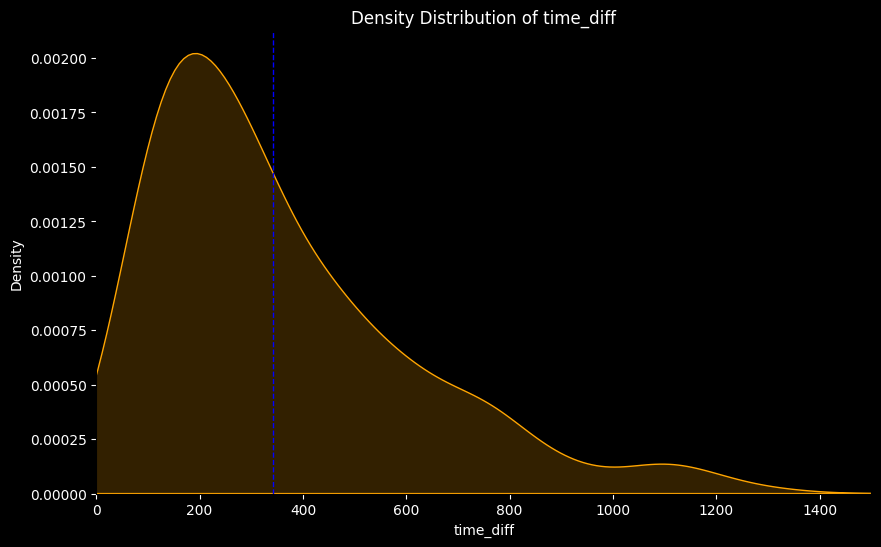

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 밀도 분포 그리기
plt.figure(figsize=(10, 6))
sns.kdeplot(AR_parts['time_diff_min'], color='orange', fill=True, alpha=0.2, label='time_diff')
# sns.kdeplot(SDMR_parts['time_diff_min'], color='blue', fill=True, alpha=0.2, label='time_diff')

# plt.axvline(w_SDMR_parts, color='green', linestyle='dashed', linewidth=1, label='wak')
plt.axvline(w_AR_parts, color='blue', linestyle='dashed', linewidth=1, label='wak')

# 축 및 레이블 설정
plt.xlabel('time_diff', color='white')
plt.ylabel('Density', color='white')
plt.title('Density Distribution of time_diff', color='white')

# 눈금 및 눈금 레이블 색상 변경
plt.tick_params(colors='white', which='both')  # x, y축의 눈금 색상 모두 변경

# X축 범위 설정
plt.xlim(0, 1500)
# plt.xticks(np.arange(0, 3.5, 0.5))  # 0.5초 간격으로 x축 눈금 설정

# 배경색 설정
ax = plt.gca()
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# 그래프 표시
# plt.grid(True)
plt.show()


## 자기장 운

자기장 운빨
* 자기장이 바뀔 때, 자기장 중심과의 거리 차이가 어느정도 되는지
* 자기장 안에서 자기장 밖의 적에게 죽은 경우


이미 적이 있어!
* 고지대에 있는 적에게 죽은 경우
* 문을 열고 들어갔는데 적이 있는 경우
* 양각

In [ ]:
df = wak_recent_df[wak_recent_df['GameMode']=='squad']

In [ ]:
col = pd.DataFrame(df.columns)

Baltic_Main 에란겔을 기준

In [ ]:
# 왁굳님의 경기중 6페이지 이상 살아남은 경기를 걸러야한다.
# 07 데이터 경기 중

wak_login = df[(df['_T'] == 'LogPlayerLogout') & (df['accountId']=='account.c2824509f5a64692bdbd999c8c981a59') |
           (df['_T'] == 'LogPlayerLogin') & (df['accountId']=='account.c2824509f5a64692bdbd999c8c981a59')][['_D','matchId','MapName','_T','character.name']]

wak_login['_D'] = pd.to_datetime(wak_login['_D'])

group = wak_login.groupby(['matchId','MapName']).agg(
    GameStart = pd.NamedAgg(column='_D',aggfunc='min'),
    SurvivorTime = pd.NamedAgg(column='_D',aggfunc=lambda x: x.diff().dt.total_seconds().sum())
).reset_index().sort_values(by=['GameStart'],ascending=False)




In [ ]:
group # 459bfacd-b7c5-46c5-a31f-9233c4ad3f3f	# Savage_Main, 사녹 (셀키,천양,놀란)

In [ ]:
wak_07_suvivor = group[(group['survivorTime'] > 400)]['matchId'].tolist()
wak_07_suvivor

* 자기장 패턴파악

In [ ]:
df[df['_T'] =='LogPlayerKillV2'].head()

# LogPlayerPosition   # character.location.x	character.location.y	character.location.z character.isInBlueZone character.zone elapsedTime
# LogPlayerKILLv2 #
# LogVehicleRide # vehicle.vehicleType	vehicle.vehicleId	vehicle.seatIndex

In [ ]:
zone_df = df[(df['_T'] == 'LogGameStatePeriodic') & (df['matchId'] == '459bfacd-b7c5-46c5-a31f-9233c4ad3f3f')].sort_values(by=['_D'])[['_T','_D','matchId','MapName','gameState.safetyZonePosition.x','gameState.safetyZonePosition.y' ,'gameState.safetyZonePosition.z','gameState.safetyZoneRadius']]


In [ ]:
zone_df['_D'] = pd.to_datetime(zone_df['_D'])
r = zone_df.groupby(['gameState.safetyZoneRadius']).agg(
    count = pd.NamedAgg(column='gameState.safetyZoneRadius',aggfunc='count'),
    next_time = pd.NamedAgg(column='_D',aggfunc=lambda x: x.diff().dt.total_seconds().sum()) # 안전지역이 유지되는 시간, 100 이라면 100초 이후에 다음 자기장이 정해진것
).reset_index().sort_values(by=['gameState.safetyZoneRadius'],ascending=False)


r


* 그렇다면 자기장 운을 파악하는데 필요한 컬럼은 ?


'_T' = 'LogGameStatePeriodic'

'gameState.safetyZonePosition.x',	'gameState.safetyZonePosition.y',	'gameState.safetyZoneRadius'

'_T' = 'LogPlayerPosition',

'character.name' , 'character.location.x', 'character.location.y',	'character.location.z' ,'character.isInBlueZone', 'character.zone', 'elapsedTime'

_T =' LogPlayerKILLV2


                  'victim.name','damageReason','victimWeapon','victim.health','victim.location.x', 'victim.location.y','victim.location.z','victimWeaponAdditionalInfo','assists_AccountId','victimGameResult.stats.statTrakDataPairs','victimGameResult.stats.headshotStatTrakDataPairs' ,# 피해를 받은 유저
                  'dBNOMaker.name','dBNODamageInfo.damageReason','dBNODamageInfo.damageTypeCategory','dBNODamageInfo.damageCauserName','dBNODamageInfo.additionalInfo','dBNODamageInfo.distance', # 기절을 만든 유저
                  'finisher.name','finisher.health','finishDamageInfo.damageReason','finishDamageInfo.damageTypeCategory','finishDamageInfo.damageCauserName','finishDamageInfo.additionalInfo','finishDamageInfo.distance', # 마무리 유저?
                  'killer.name','killer.health','killerDamageInfo.damageReason','killerDamageInfo.damageTypeCategory','killerDamageInfo.damageCauserName','killerDamageInfo.additionalInfo',
                  'killer.location.x', 'killer.location.y','killer.location.z','killerDamageInfo.distance',




In [ ]:
# 데이터 총 정리

col = ['matchId','MapName','_D','_T', 'character.name' , 'character.location.x', 'character.location.y', 'character.location.z' ,'character.isInBlueZone', 'character.zone', 'elapsedTime',
       'gameState.safetyZonePosition.x', 'gameState.safetyZonePosition.y', 'gameState.safetyZoneRadius',
        'victim.name','damageReason','victimWeapon','victim.health','victim.location.x', 'victim.location.y','victim.location.z','victim.isInBlueZone', # 피해를 받은 유저
        'dBNOMaker.name','dBNODamageInfo.damageReason','dBNODamageInfo.damageTypeCategory','dBNODamageInfo.damageCauserName','dBNODamageInfo.additionalInfo','dBNODamageInfo.distance','dBNOMaker.isInBlueZone', # 기절을 만든 유저
        'killer.name','killer.health','killerDamageInfo.damageReason','killerDamageInfo.damageTypeCategory','killerDamageInfo.damageCauserName','killerDamageInfo.additionalInfo',
        'killer.location.x', 'killer.location.y','killer.location.z','killerDamageInfo.distance', 'killer.isInBlueZone']

bluezone_df = df[df['_T'].isin(['LogPlayerKillV2','LogPlayerPosition','LogGameStatePeriodic'])][col]


In [ ]:
bluezone_df = bluezone_df.drop_duplicates(keep=False)

* 에란겔 등고선 이미지
https://gall.dcinside.com/mgallery/board/view/?id=blueholegame&no=148022

In [ ]:
# match_datas 저장
csv_file_path = '/content/drive/MyDrive/PUBG/bluezone_df(0711).csv'
bluezone_df.to_csv(csv_file_path, index=False)

### 자기장 운을 확인하기 위한 dataframe

In [ ]:
wak1 = '/content/drive/MyDrive/PUBG/bluezone_df(06).csv'
wak2 = '/content/drive/MyDrive/PUBG/bluezone_df(07).csv'
wak3 = '/content/drive/MyDrive/PUBG/bluezone_df(0705).csv'
wak4 = '/content/drive/MyDrive/PUBG/bluezone_df(0711).csv'


df1 = load_csv_in_chunks(wak1)
df2 = load_csv_in_chunks(wak2)
df3 = load_csv_in_chunks(wak3)
df4 = load_csv_in_chunks(wak4)

df  = pd.concat([df1,df2,df3,df4])

In [ ]:
df4[df4['matchId'] == 'f4ec1aa0-dcb6-4418-8326-d28571067440'].head(100)

In [ ]:
df = df.drop_duplicates(keep=False)
df = df[(df['elapsedTime'] != 0 )]


In [ ]:
# prompt: df.duplicated() 인 matchId 값을 가져와야해

df[(df['matchId'] == 'df03fe5b-e7b1-4359-942a-08b1ec2dd810') & (df['character.name'] == 'ChunYang') ].sort_values(by=['_D'])

* 각 페이즈 별로 자기장의 중심과의 거리


In [ ]:
df[(df['matchId'] == 'ab005b83-495a-4727-9429-d1a6f21cbdca')].head(100) # mygomiee

In [ ]:
# prompt: gameState.safetyZonePosition.x	gameState.safetyZonePosition.y	gameState.safetyZoneRadius 컬럼의 값이 nan 이 아닌 행만 가져와줘

test = df[df['gameState.safetyZonePosition.x'].notna()]

test

In [ ]:
df['_D'] = pd.to_datetime(df['_D'])


In [ ]:
id = 'f4ec1aa0-dcb6-4418-8326-d28571067440'


sample = df[df['matchId'] == id]

In [ ]:
df[(df['_T'] == 'LogGameStatePeriodic')].sort_values(by=['_D'])[['_T','_D','matchId','MapName','gameState.safetyZonePosition.x','gameState.safetyZonePosition.y' ,'gameState.safetyZoneRadius']]


_T                        _D  \
277072  LogGameStatePeriodic  2024-07-05T15:44:53.421Z   
277172  LogGameStatePeriodic  2024-07-05T15:45:03.441Z   
277272  LogGameStatePeriodic  2024-07-05T15:45:13.439Z   
277372  LogGameStatePeriodic  2024-07-05T15:45:23.429Z   
277472  LogGameStatePeriodic  2024-07-05T15:45:33.430Z   
277572  LogGameStatePeriodic  2024-07-05T15:45:43.427Z   
277672  LogGameStatePeriodic  2024-07-05T15:45:53.441Z   
277772  LogGameStatePeriodic  2024-07-05T15:46:03.515Z   
277874  LogGameStatePeriodic  2024-07-05T15:46:13.465Z   
277977  LogGameStatePeriodic  2024-07-05T15:46:23.466Z   
278078  LogGameStatePeriodic  2024-07-05T15:46:33.448Z   
278180  LogGameStatePeriodic  2024-07-05T15:46:43.475Z   
278278  LogGameStatePeriodic  2024-07-05T15:46:53.448Z   
278379  LogGameStatePeriodic  2024-07-05T15:47:03.449Z   
278473  LogGameStatePeriodic  2024-07-05T15:47:13.438Z   
278564  LogGameStatePeriodic  2024-07-05T15:47:23.455Z   
278654  LogGameStatePeriodic  2024-07-05T15:47:33.438Z   
278738  LogGameStatePeriodic  2024-07-05T15:47:43.432Z   
278819  LogGameStatePeriodic  2024-07-05T15:47:53.452Z   
278899  LogGameStatePeriodic  2024-07-05T15:48:03.435Z   
278978  LogGameStatePeriodic  2024-07-05T15:48:13.444Z   
279058  LogGameStatePeriodic  2024-07-05T15:48:23.454Z   
279138  LogGameStatePeriodic  2024-07-05T15:48:33.430Z   
279217  LogGameStatePeriodic  2024-07-05T15:48:43.457Z   
279300  LogGameStatePeriodic  2024-07-05T15:48:53.443Z   
279376  LogGameStatePeriodic  2024-07-05T15:49:03.451Z   
279450  LogGameStatePeriodic  2024-07-05T15:49:13.448Z   
279524  LogGameStatePeriodic  2024-07-05T15:49:23.445Z   
279597  LogGameStatePeriodic  2024-07-05T15:49:33.438Z   
279670  LogGameStatePeriodic  2024-07-05T15:49:43.454Z   
279740  LogGameStatePeriodic  2024-07-05T15:49:53.429Z   
279810  LogGameStatePeriodic  2024-07-05T15:50:03.449Z   
279879  LogGameStatePeriodic  2024-07-05T15:50:13.440Z   
279948  LogGameStatePeriodic  2024-07-05T15:50:23.459Z   
280019  LogGameStatePeriodic  2024-07-05T15:50:33.440Z   
280090  LogGameStatePeriodic  2024-07-05T15:50:43.458Z   
280161  LogGameStatePeriodic  2024-07-05T15:50:53.434Z   
280229  LogGameStatePeriodic  2024-07-05T15:51:03.437Z   
280298  LogGameStatePeriodic  2024-07-05T15:51:13.446Z   
280364  LogGameStatePeriodic  2024-07-05T15:51:23.440Z   
280429  LogGameStatePeriodic  2024-07-05T15:51:33.459Z   
280493  LogGameStatePeriodic  2024-07-05T15:51:43.451Z   
280556  LogGameStatePeriodic  2024-07-05T15:51:53.445Z   
280619  LogGameStatePeriodic  2024-07-05T15:52:03.448Z   
280685  LogGameStatePeriodic  2024-07-05T15:52:13.433Z   
280747  LogGameStatePeriodic  2024-07-05T15:52:23.427Z   
280806  LogGameStatePeriodic  2024-07-05T15:52:33.436Z   
280865  LogGameStatePeriodic  2024-07-05T15:52:43.447Z   
280922  LogGameStatePeriodic  2024-07-05T15:52:53.442Z   
280979  LogGameStatePeriodic  2024-07-05T15:53:03.452Z   
281036  LogGameStatePeriodic  2024-07-05T15:53:13.455Z   
281092  LogGameStatePeriodic  2024-07-05T15:53:23.431Z   
281148  LogGameStatePeriodic  2024-07-05T15:53:33.453Z   
281203  LogGameStatePeriodic  2024-07-05T15:53:43.443Z   
281260  LogGameStatePeriodic  2024-07-05T15:53:53.431Z   
281312  LogGameStatePeriodic  2024-07-05T15:54:03.458Z   
281364  LogGameStatePeriodic  2024-07-05T15:54:13.442Z   
281416  LogGameStatePeriodic  2024-07-05T15:54:23.446Z   
281468  LogGameStatePeriodic  2024-07-05T15:54:33.431Z   
281519  LogGameStatePeriodic  2024-07-05T15:54:43.451Z   
281572  LogGameStatePeriodic  2024-07-05T15:54:53.439Z   
281626  LogGameStatePeriodic  2024-07-05T15:55:03.428Z   
281679  LogGameStatePeriodic  2024-07-05T15:55:13.452Z   
281733  LogGameStatePeriodic  2024-07-05T15:55:23.449Z   
281782  LogGameStatePeriodic  2024-07-05T15:55:33.444Z   
281831  LogGameStatePeriodic  2024-07-05T15:55:43.435Z   
281881  LogGameStatePeriodic  2024-07-05T15:55:53.428Z   
281929  LogGameStatePeriodic  2024-07-05T15:56:03.448Z   
281977  LogGameStatePeri

In [ ]:
zone_df = df[(df['_T'] == 'LogGameStatePeriodic')].sort_values(by=['_D'])[['_T','_D','matchId','MapName','gameState.safetyZonePosition.x','gameState.safetyZonePosition.y' ,'gameState.safetyZoneRadius']]

zone_df['_D'] = pd.to_datetime(zone_df['_D'])
zone_df = zone_df.groupby(['matchId','gameState.safetyZonePosition.x','gameState.safetyZonePosition.y','gameState.safetyZoneRadius']).agg(
    _D = pd.NamedAgg(column='_D',aggfunc = 'max'), # 다음 자기장이 정해지는 시간
    count = pd.NamedAgg(column='gameState.safetyZoneRadius',aggfunc='count'),
    during_time = pd.NamedAgg(column='_D',aggfunc=lambda x: x.diff().dt.total_seconds().sum()),# 안전지역이 유지되는 시간, 100 이라면 100초 이후에 다음 자기장이 정해진것

    ).reset_index().sort_values(by=['matchId','gameState.safetyZoneRadius'],ascending=False)


zone_df = zone_df[zone_df['count']> 3].reset_index()
zone_df['page'] = zone_df.groupby('matchId')['gameState.safetyZoneRadius'].rank(method='dense', ascending=False).astype('int')

zone_df

In [ ]:
sample_zone = zone_df[zone_df['matchId'] == 'df03fe5b-e7b1-4359-942a-08b1ec2dd810'][:2]

In [ ]:
# zone_df = zone_df[zone_df['page'] > 0]
zone_df['next_SafetyZoneRadius'] = zone_df.groupby('matchId')['gameState.safetyZoneRadius'].shift(-1)
zone_df['next_SafetyZone.x'] = zone_df.groupby('matchId')['gameState.safetyZonePosition.x'].shift(-1)
zone_df['next_SafetyZone.y'] = zone_df.groupby('matchId')['gameState.safetyZonePosition.y'].shift(-1)

zd = zone_df[['matchId','_D','gameState.safetyZoneRadius','page','next_SafetyZoneRadius','next_SafetyZone.x','next_SafetyZone.y']]



In [ ]:
zd[zd['matchId']==id][['matchId','_D','page','next_SafetyZoneRadius','next_SafetyZone.x','next_SafetyZone.y']]

matchId                               _D  \
19  f4ec1aa0-dcb6-4418-8326-d28571067440 2024-07-05 15:50:13.440000+00:00   
20  f4ec1aa0-dcb6-4418-8326-d28571067440 2024-07-05 15:56:43.462000+00:00   
21  f4ec1aa0-dcb6-4418-8326-d28571067440 2024-07-05 15:59:53.448000+00:00   
22  f4ec1aa0-dcb6-4418-8326-d28571067440 2024-07-05 16:02:53.427000+00:00   
23  f4ec1aa0-dcb6-4418-8326-d28571067440 2024-07-05 16:05:53.440000+00:00   
24  f4ec1aa0-dcb6-4418-8326-d28571067440 2024-07-05 16:08:23.433000+00:00   
25  f4ec1aa0-dcb6-4418-8326-d28571067440 2024-07-05 16:10:03.435000+00:00   

    page  next_SafetyZoneRadius  next_SafetyZone.x  next_SafetyZone.y  
19     1          203699.687500       547827.18750        555007.4375  
20     2          112034.828125       491371.40625        570725.6875  
21     3           67220.898438       509809.84375        608037.3125  
22     4           36971.496094       523995.59375        585983.5625  
23     5           18485.748047       506566.25000        582786.5625  
24     6            9242.874023       501642.34375        585502.6875  
25     7                    NaN                NaN                NaN

In [ ]:
# 자기장이 좁혀졌을 때 새로운 자기장이나오고, 이 때 유저의 위치를 구하면된다.

position_col = ['matchId','MapName','_D','_T', 'character.name' , 'character.location.x', 'character.location.y', 'character.location.z' , 'elapsedTime']
bluzone_col = ['gameState.safetyZonePosition.x','gameState.safetyZonePosition.y' ,'gameState.safetyZoneRadius']
player_position = df[(df['_T'] == 'LogPlayerPosition') & (df['character.name'] == 'wakgood') | (df['_T'] == 'LogGameStatePeriodic')].sort_values(by=['_D'])[position_col + bluzone_col]
test = pd.merge(player_position, zd,on=['matchId','_D','gameState.safetyZoneRadius'],how='left')


In [ ]:
# player_position[player_position['matchId'] ==id].sort_values(by=['_D'],ascending=False).head(100)

test[test['matchId'] == id].sort_values(by=['_D'],ascending=True).head(100)#[position_col + bluzone_col]

In [ ]:
# prompt: gameState.safetyZonePosition.x	gameState.safetyZonePosition.y	gameState.safetyZoneRadius	page	next_blueZoneRadius	next_blueZone.x	next_blueZone.y	lag.character.location.x	lag.character.location.y	lag.character.location.z  를 리스트로

col_list = ['matchId','MapName','_D',
'lag.character.location.x',
'lag.character.location.y',
'lag.character.location.z',
'page',
'next_SafetyZoneRadius','next_SafetyZone.x','next_SafetyZone.y']


In [ ]:
test['lag.character.location.x'] = test.groupby('matchId')['character.location.x'].shift(1)
test['lag.character.location.y'] = test.groupby('matchId')['character.location.y'].shift(1)
test['lag.character.location.z'] = test.groupby('matchId')['character.location.z'].shift(1)


In [ ]:
# 330 초 이후에 2차 자기장 영역쪽으로 블루존이 좁혀진다.
test[test['matchId'] == id]

matchId      MapName  \
18239  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18240  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18241  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18242  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18243  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18244  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18245  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18246  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18247  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18248  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18249  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18250  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18251  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18252  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18253  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18254  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18255  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18256  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18257  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18258  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18259  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18260  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18261  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18262  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18263  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18264  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18265  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18266  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18267  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18268  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18269  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18270  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18271  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18272  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18273  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18274  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18275  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18276  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18277  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18278  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18279  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18280  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18281  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18282  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18283  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18284  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18285  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18286  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18287  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18288  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18289  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18290  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18291  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18292  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18293  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18294  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18295  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18296  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18297  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18298  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18299  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18300  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18301  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18302  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18303  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18304  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   
18305  f4ec1aa0-

In [ ]:
wak_position = test[test['page'] >= 0][col_list]
# 각 블루존에 대해 캐릭터가 블루존 안에 있는지 여부 계산
is_in_bluezone = []

for index, row in wak_position.iterrows():
    character_x = row['lag.character.location.x']  # 'next_SafetyZoneRadius','next_SafetyZone.x','next_SafetyZone.y'
    character_y = row['lag.character.location.y']
    bluezone_x = row['next_SafetyZone.x']
    bluezone_y = row['next_SafetyZone.y']
    bluezone_radius = row['next_SafetyZoneRadius']

    # 캐릭터와 블루존 중심 간의 거리 계산
    distance_to_center = np.sqrt((bluezone_x - character_x)**2 + (bluezone_y - character_y)**2)

    # 블루존 안에 있는지 여부 확인
    if distance_to_center <= bluezone_radius:
        is_in_bluezone.append(True)
    else:
        is_in_bluezone.append(False)

# 결과 출력
wak_position['is_in_zone'] = is_in_bluezone


In [ ]:
# 현재 페이지가 2 이고, 다음 블루존(3) 의 위치와, 현재 유저의 위치, 그리고 다음 자기장의 위치가 나왔을 때, 왁굳님이 안전영역안에 들어왔는지
t = wak_position[['matchId','MapName','page','next_SafetyZone.x','next_SafetyZone.y','next_SafetyZoneRadius','lag.character.location.x','lag.character.location.y','is_in_zone']]#[:5].reset_index()


In [ ]:
t[t['MapName'] == 'Baltic_Main'].sort_values(by=['matchId','page'],ascending=True)

matchId      MapName  page  \
14525  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96  Baltic_Main   1.0   
14613  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96  Baltic_Main   2.0   
14651  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96  Baltic_Main   3.0   
14687  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96  Baltic_Main   4.0   
14723  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96  Baltic_Main   5.0   
14753  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96  Baltic_Main   6.0   
14773  0b6c1c52-84a7-4291-ad1c-9ddc7d55ef96  Baltic_Main   7.0   
13253  19e2b63c-e65d-4d8e-baa8-52d9242f457a  Baltic_Main   1.0   
13331  19e2b63c-e65d-4d8e-baa8-52d9242f457a  Baltic_Main   2.0   
13369  19e2b63c-e65d-4d8e-baa8-52d9242f457a  Baltic_Main   3.0   
13387  19e2b63c-e65d-4d8e-baa8-52d9242f457a  Baltic_Main   4.0   
13437  19e2b63c-e65d-4d8e-baa8-52d9242f457a  Baltic_Main   5.0   
13482  19e2b63c-e65d-4d8e-baa8-52d9242f457a  Baltic_Main   6.0   
13512  19e2b63c-e65d-4d8e-baa8-52d9242f457a  Baltic_Main   7.0   
1399   20e42870-1e20-4369-b4eb-8863b48d9fe2  Baltic_Main   1.0   
1477   20e42870-1e20-4369-b4eb-8863b48d9fe2  Baltic_Main   2.0   
1515   20e42870-1e20-4369-b4eb-8863b48d9fe2  Baltic_Main   3.0   
1551   20e42870-1e20-4369-b4eb-8863b48d9fe2  Baltic_Main   4.0   
1587   20e42870-1e20-4369-b4eb-8863b48d9fe2  Baltic_Main   5.0   
1605   20e42870-1e20-4369-b4eb-8863b48d9fe2  Baltic_Main   6.0   
1622   20e42870-1e20-4369-b4eb-8863b48d9fe2  Baltic_Main   7.0   
1649   20e42870-1e20-4369-b4eb-8863b48d9fe2  Baltic_Main   8.0   
3343   2cfd0324-8814-4155-990f-3f43bc6088b0  Baltic_Main   1.0   
3421   2cfd0324-8814-4155-990f-3f43bc6088b0  Baltic_Main   2.0   
3459   2cfd0324-8814-4155-990f-3f43bc6088b0  Baltic_Main   3.0   
3495   2cfd0324-8814-4155-990f-3f43bc6088b0  Baltic_Main   4.0   
3531   2cfd0324-8814-4155-990f-3f43bc6088b0  Baltic_Main   5.0   
3561   2cfd0324-8814-4155-990f-3f43bc6088b0  Baltic_Main   6.0   
3581   2cfd0324-8814-4155-990f-3f43bc6088b0  Baltic_Main   7.0   
3599   2cfd0324-8814-4155-990f-3f43bc6088b0  Baltic_Main   8.0   
1692   331c4e4b-ae7c-4f63-b202-77216dd733ee  Baltic_Main   1.0   
1770   331c4e4b-ae7c-4f63-b202-77216dd733ee  Baltic_Main   2.0   
1804   331c4e4b-ae7c-4f63-b202-77216dd733ee  Baltic_Main   3.0   
1846   331c4e4b-ae7c-4f63-b202-77216dd733ee  Baltic_Main   4.0   
1900   331c4e4b-ae7c-4f63-b202-77216dd733ee  Baltic_Main   5.0   
1945   331c4e4b-ae7c-4f63-b202-77216dd733ee  Baltic_Main   6.0   
1966   331c4e4b-ae7c-4f63-b202-77216dd733ee  Baltic_Main   7.0   
24202  4aeef99e-566c-41c3-aa60-28a5ce2c4b7e  Baltic_Main   1.0   
24280  4aeef99e-566c-41c3-aa60-28a5ce2c4b7e  Baltic_Main   2.0   
24318  4aeef99e-566c-41c3-aa60-28a5ce2c4b7e  Baltic_Main   3.0   
24354  4aeef99e-566c-41c3-aa60-28a5ce2c4b7e  Baltic_Main   4.0   
24390  4aeef99e-566c-41c3-aa60-28a5ce2c4b7e  Baltic_Main   5.0   
24420  4aeef99e-566c-41c3-aa60-28a5ce2c4b7e  Baltic_Main   6.0   
24440  4aeef99e-566c-41c3-aa60-28a5ce2c4b7e  Baltic_Main   7.0   
24458  4aeef99e-566c-41c3-aa60-28a5ce2c4b7e  Baltic_Main   8.0   
13487  4f316088-84fb-4309-9590-3cff29f3f62a  Baltic_Main   1.0   
13576  4f316088-84fb-4309-9590-3cff29f3f62a  Baltic_Main   2.0   
13614  4f316088-84fb-4309-9590-3cff29f3f62a  Baltic_Main   3.0   
13650  4f316088-84fb-4309-9590-3cff29f3f62a  Baltic_Main   4.0   
13676  4f316088-84fb-4309-9590-3cff29f3f62a  Baltic_Main   5.0   
13704  4f316088-84fb-4309-9590-3cff29f3f62a  Baltic_Main   6.0   
13733  4f316088-84fb-4309-9590-3cff29f3f62a  Baltic_Main   7.0   
13754  4f316088-84fb-4309-9590-3cff29f3f62a  Baltic_Main   8.0   
1098   706c3a32-0f84-4c47-bb30-5156106eaecb  Baltic_Main   1.0   
1176   706c3a32-0f84-4c47-bb30-5156106eaecb  Baltic_Main   2.0   
1214   706c3a32-0f84-4c47-bb30-5156106eaecb  Baltic_Main   3.0   
1250   706c3a32-0f84-4c47-bb30-5156106eaecb  Baltic_Main   4.0   
1286   706c3a32-0f84-4c47-bb30-5156106eaecb  Baltic_Main   5.0   
1312   706c3a32-0f84-4c47-bb30-5156106eaecb  Baltic_Main   6.0   
1322   706c3a32-0f84-4c47-bb30-5156106eaecb  Baltic_Main   7.0   
1331   706

In [ ]:
# prompt: t.loc[t['next_blueZone.x'].isna() & t['lag.character.location.x'].notna(), 'win']  matchid 별로 1을 기입해야해

t.loc[t['next_SafetyZone.x'].isna() & t['lag.character.location.x'].notna(), 'win'] = 1


<ipython-input-29-9333ddff4877>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t.loc[t['next_blueZone.x'].isna() & t['lag.character.location.x'].notna(), 'win'] = 1


In [ ]:
t[t['matchId'] == id]#[['matchId','MapName','page','']]

matchId      MapName  page  \
18303  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   1.0   
18381  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   2.0   
18419  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   3.0   
18455  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   4.0   
18491  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   5.0   
18512  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   6.0   
18542  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   7.0   

       next_SafetyZone.x  next_SafetyZone.y  next_SafetyZoneRadius  \
18303       547827.18750        555007.4375          203699.687500   
18381       491371.40625        570725.6875          112034.828125   
18419       509809.84375        608037.3125           67220.898438   
18455       523995.59375        585983.5625           36971.496094   
18491       506566.25000        582786.5625           18485.748047   
18512       501642.34375        585502.6875            9242.874023   
18542                NaN                NaN                    NaN   

       lag.character.location.x  lag.character.location.y  is_in_zone  
18303              315614.00000              42967.050781       False  
18381              375744.65625             128595.515625       False  
18419              446187.65625             474303.062500       False  
18455              494610.00000             558564.750000       False  
18491                       NaN                       NaN       False  
18512                       NaN                       NaN       False  
18542                       NaN                       NaN       False

In [ ]:
#  lag.character.location.x	lag.character.location.y	컬럼의 값만 nan 인 경우 죽은것
# 유저의 좌표는 있지만 자기장이 nana 인 경우 -> 게임에 승리해서 자기장이 더이상 안옴

fianl_bluzone_df = t.dropna(subset=['lag.character.location.x','lag.character.location.y','next_SafetyZone.x'	,'next_SafetyZone.y',	'next_SafetyZoneRadius'])

len(fianl_bluzone_df['matchId'].unique())

97

In [ ]:
# prompt: ext_blueZone.x	next_SafetyZone.y	next_SafetyZoneRadius  원의 영역과  lag.character.location.x	lag.character.location.y 좌표간의 최소한의 거리를 구하려면?

import numpy as np

def min_distance_to_circle(next_SafetyZone_x, next_SafetyZone_y, next_SafetyZoneRadius, lag_character_location_x, lag_character_location_y):

    distance_to_center = np.sqrt((next_SafetyZone_x - lag_character_location_x)**2 + (next_SafetyZone_y - lag_character_location_y)**2)

    # Calculate the minimum distance to enter the circle's area
    min_distance = (distance_to_center - next_SafetyZoneRadius)/100

    # Return the minimum distance (maximum of 0 and min_distance to ensure non-negative return value)
    return max(0, min_distance)

fianl_bluzone_df['distance'] = fianl_bluzone_df.apply(lambda row: min_distance_to_circle(row['next_SafetyZone.x'], row['next_SafetyZone.y'], row['next_SafetyZoneRadius'], row['lag.character.location.x'], row['lag.character.location.y']), axis=1)


<ipython-input-262-f137e04f6f3f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fianl_bluzone_df['distance'] = fianl_bluzone_df.apply(lambda row: min_distance_to_circle(row['next_SafetyZone.x'], row['next_SafetyZone.y'], row['next_SafetyZoneRadius'], row['lag.character.location.x'], row['lag.character.location.y']), axis=1)


In [ ]:
# 각매치의 max page, 몇 page 까지 버텼는지
fianl_bluzone_df['max_page'] = fianl_bluzone_df.groupby(['matchId','MapName'])['page'].transform('max')

# 평균적으로 몇page 까지 가나?

map_3 = fianl_bluzone_df[fianl_bluzone_df['MapName'].isin([ 'Baltic_Main', 'Savage_Main', 'Desert_Main'])]



In [ ]:
len(map_3[map_3['max_page'] > 3]['matchId'].unique())

38

In [ ]:
sm = fianl_bluzone_df[fianl_bluzone_df['matchId'] == '74c490aa-3939-42c3-a135-7f49b34c6d69'][:7].reset_index()
sm

index                               matchId      MapName  page  \
0    540  74c490aa-3939-42c3-a135-7f49b34c6d69  Savage_Main   1.0   
1    612  74c490aa-3939-42c3-a135-7f49b34c6d69  Savage_Main   2.0   
2    654  74c490aa-3939-42c3-a135-7f49b34c6d69  Savage_Main   3.0   
3    690  74c490aa-3939-42c3-a135-7f49b34c6d69  Savage_Main   4.0   
4    722  74c490aa-3939-42c3-a135-7f49b34c6d69  Savage_Main   5.0   

   next_SafetyZone.x  next_SafetyZone.y  next_SafetyZoneRadius  \
0       271517.34375      281534.343750          145609.578125   
1       286022.81250      256145.062500          101926.703125   
2       270317.62500      226261.515625           61156.023438   
3       275781.56250      199424.703125           30578.011719   
4       266893.78125      188640.906250           15289.005859   

   lag.character.location.x  lag.character.location.y  is_in_zone  distance  
0              313467.53125             143163.984375        True       0.0  
1              277488.50000             200500.234375        True       0.0  
2              271187.28125             201127.515625        True       0.0  
3              272487.71875             202147.484375        True       0.0  
4              271985.59375             200699.625000        True       0.0

> 아래의 테이블의 경우 (모든 경기를 전체로 보았을 때 (자기장 페이지가 오기도 전에 죽은 경우도 포함)

에란겔에서 경기한 89 경기중 자기장 1페이지가 도달하고 2페이지가 safetyzone이 정의 되었을 때, isin 한 경우가 총 8번 있고, 나머지는 그전에 죽은 경우라고 볼 수 있음

In [ ]:
len(fianl_bluzone_df[(fianl_bluzone_df['MapName'] == 'Baltic_Main') & (fianl_bluzone_df['page'] == 1.0)])

20

In [ ]:
fianl_bluzone_df

In [ ]:
# prompt: test 데이터프레임에서 유니크한 matchid 와 mapname 을  가져오려면?

totalcnt = test[['matchId', 'MapName']].drop_duplicates()
totalcnt = totalcnt.groupby(['MapName']).agg(
    mcnt= pd.NamedAgg(column='matchId',aggfunc='count')
).reset_index()

In [ ]:
df[df['MapName'] == 'Baltic_Main']['matchId'].nunique()

21

In [ ]:
# 페이지에 도달 하지 못한 죽은 경기도 포함해야할까? -> 온전히 자기장운만 보기위해서는 빼는게 맞다.
# 포함시 생존력 + 자기장운이 결합된 지표임


test = fianl_bluzone_df.groupby(['MapName','page']).agg(
    is_in_zone_cnt = pd.NamedAgg(column='is_in_zone',aggfunc='sum'),

).reset_index()


merge_df = pd.merge(test,totalcnt,on='MapName')
# test['map_total_cnt'] = test.groupby('MapName')['map_cnt'].transofrm('sum')
merge_df['ratio'] = merge_df['is_in_zone_cnt'] / merge_df['mcnt']
merge_df

In [ ]:
merge_df

In [ ]:
# 피봇
merge_df = merge_df[merge_df['MapName'].isin([ 'Baltic_Main', 'Savage_Main', 'Tiger_Main', 'Desert_Main'])]
pivot_page_ratio = merge_df.pivot_table(index='MapName', columns='page', values='ratio')
pivot_page_ratio

page              1.0       2.0       3.0       4.0       5.0       6.0  \
MapName                                                                   
Baltic_Main  0.380952  0.571429  0.523810  0.523810  0.238095  0.190476   
Desert_Main  0.400000  0.450000  0.550000  0.400000  0.250000  0.150000   
Savage_Main  0.458333  0.500000  0.416667  0.208333  0.125000  0.083333   
Tiger_Main   0.785714  0.571429  0.500000  0.500000  0.357143  0.214286   

page              7.0  8.0  
MapName                     
Baltic_Main  0.095238  NaN  
Desert_Main  0.050000  0.0  
Savage_Main  0.000000  NaN  
Tiger_Main   0.000000  NaN

In [ ]:
bluezone_by_map = fianl_bluzone_df.groupby(['matchId','MapName']).agg(
    page_cnt = pd.NamedAgg(column='page',aggfunc='max'),
    is_in_zone_cnt = pd.NamedAgg(column='is_in_zone',aggfunc='sum'),
    max_distance = pd.NamedAgg(column='distance',aggfunc='max'),
).reset_index().sort_values(by=['matchId','page_cnt'],ascending=False)

bluezone_by_map


#### 자기장 맵 or 페이지별 in safety zone count

> 어떻게? 요약해야할까?
* 페이지 count
* 페이지별 is in zone
* 맵별 is in zone (10판 이상 누적된 맵 : Baltic_Main, Savage_Main, Tiger_Main, Desert_Main)


> 4번연속 자기장에 들어간 경우



* 세이프티존에 연속으로 들어가서 승리한 경우도 있지만 진경기도 있다.
* 세이프티존에 한번도 들어간 적이 없지만 승리한 경우도 있다.




In [ ]:
# prompt: bluezon_by_page  위코드에서 page 가 6이상인경우 모두 6으로 묶어줘

bluezone_by_map['page_cnt'] = bluezone_by_map['page_cnt'].apply(lambda x: 6 if x > 5 else x)


In [ ]:
bluezone_by_page = fianl_bluzone_df.groupby(['matchId','MapName','page']).agg(
    is_in_zone_cnt = pd.NamedAgg(column='is_in_zone',aggfunc='sum'),
    max_distance = pd.NamedAgg(column='distance',aggfunc='max'),
).reset_index().sort_values(by=['matchId','MapName','page'],ascending=True)

bluezone_by_page = bluezone_by_page[bluezone_by_page['MapName'].isin([ 'Baltic_Main', 'Savage_Main', 'Desert_Main'])]
bluezone_by_page['isin_zone_sum'] = bluezone_by_page.groupby('matchId')['is_in_zone_cnt'].transform('sum')




* 최악의 자기장,  최소한 세이프티존 영역에 들어가기 위해 가장 많이 움직여야 했던 경기  

In [ ]:
fianl_bluzone_df.groupby(['matchId','MapName']).agg(
    distance_sum = pd.NamedAgg(column='distance',aggfunc='sum'),
).reset_index().sort_values(by=['distance_sum'],ascending=False)

In [ ]:
 fianl_bluzone_df[fianl_bluzone_df['matchId'] == 'f4ec1aa0-dcb6-4418-8326-d28571067440']

matchId      MapName  page  \
18303  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   1.0   
18381  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   2.0   
18419  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   3.0   
18455  f4ec1aa0-dcb6-4418-8326-d28571067440  Desert_Main   4.0   

       next_blueZone.x  next_blueZone.y  next_blueZoneRadius  \
18303     547827.18750      555007.4375        203699.687500   
18381     491371.40625      570725.6875        112034.828125   
18419     509809.84375      608037.3125         67220.898438   
18455     523995.59375      585983.5625         36971.496094   

       lag.character.location.x  lag.character.location.y  is_in_zone  \
18303              315614.00000              42967.050781       False   
18381              375744.65625             128595.515625       False   
18419              446187.65625             474303.062500       False   
18455              494610.00000             558564.750000       False   

          distance  max_page  
18303  3585.354253       4.0  
18381  3449.647717       4.0  
18419   808.758009       4.0  
18455    32.193536       4.0

* 연속으로 세이프티존에 들어간 경우

In [ ]:
# prompt: bluezone_by_page DataFrame 사용: is_in_zone_cnt 값이 연속적(3번) 으로 1인 경우를 찾고 싶어
Streak_safe = bluezone_by_page.groupby(['matchId','MapName'])['is_in_zone_cnt'].rolling(0).sum()
Streak_safe = Streak_safe[Streak_safe==0]
Streak_safe = pd.DataFrame(Streak_safe).reset_index()[['matchId','MapName','is_in_zone_cnt']]
list_safe = Streak_safe['matchId'].unique().tolist()
Streak_safe

NameError: name 'bluezone_by_page' is not defined

In [ ]:
# 피봇
bluezone_by_page = bluezone_by_page[bluezone_by_page['MapName'].isin([ 'Baltic_Main', 'Savage_Main', 'Tiger_Main', 'Desert_Main'])]
pivot_page_ratio = bluezone_by_page.pivot_table(index='MapName', columns='page', values='ratio')
pivot_page_distance = bluezone_by_page.pivot_table(index='MapName', columns='page', values='max_distance')


pivot_page_ratio

KeyError: 'ratio'

In [ ]:
zd.head()

matchId                               _D  \
0  fed52b45-4493-4ce4-9a96-9ec7da903b7e 2024-07-05 18:17:05.064000+00:00   
1  fed52b45-4493-4ce4-9a96-9ec7da903b7e 2024-07-05 18:23:35.072000+00:00   
2  fed52b45-4493-4ce4-9a96-9ec7da903b7e 2024-07-05 18:26:45.058000+00:00   
3  fed52b45-4493-4ce4-9a96-9ec7da903b7e 2024-07-05 18:29:45.084000+00:00   
4  fed52b45-4493-4ce4-9a96-9ec7da903b7e 2024-07-05 18:32:45.073000+00:00   

   gameState.safetyZoneRadius  page  next_blueZoneRadius  next_blueZone.x  \
0               581999.125000     1        203699.687500     317069.21875   
1               203699.687500     2        112034.828125     356760.40625   
2               112034.828125     3         67220.898438     337631.68750   
3                67220.898438     4         36971.496094     324933.93750   
4                36971.496094     5         18485.748047     318682.84375   

   next_blueZone.y  
0      610125.8750  
1      588603.9375  
2      577792.4375  
3      564931.9375  
4      574111.4375

* Page_cnt

자기장 운이 안좋다는 것을 어떻게 나타낼 수 있을까...? 경기별로 버틴 자기장page도 다르다

* 3 PAGE 이상 경기에서
* isin_zone_cnt가 적고 + 안전 zone 과의 최소거리도 가장 멀었던 경우

In [ ]:
id = 'f4ec1aa0-dcb6-4418-8326-d28571067440'
sm = fianl_bluzone_df[fianl_bluzone_df['matchId'] == id][:4].reset_index()
sample = df[df['matchId'] == id]
wak_position = sample[(sample['character.name'] == 'wakgood') & (sample['_T'] == 'LogPlayerPosition')][['_D','_T','character.name','character.location.x',	'character.location.y' ,'character.location.z']][15:]
sm

In [ ]:
wak_position

In [ ]:
from matplotlib.patches import Circle

# 지도 이미지 불러오기
map_image_path =  '/content/미라마.webp'  #'/content/에란겔.webp' # '/content/사녹.webp'
img = Image.open(map_image_path)
img_width, img_height = img.size
map_size = 800000

# 게임 좌표를 이미지 좌표로 변환하는 함수
def game_to_image_coordinates(game_x, game_y, img_width, img_height, map_size):
    img_x = (game_x / map_size) * img_width
    img_y = img_height - (game_y / map_size) * img_height  # y 좌표는 위에서 아래로 내려가기 때문에 반전 필요
    return img_x, img_y

# 블루존 위치와 반경을 이미지 좌표로 변환
sm[['img_x', 'img_y']] = sm.apply(
    lambda row: pd.Series(game_to_image_coordinates(row['next_SafetyZone.x'], row['next_SafetyZone.y'], img_width, img_height, map_size )),
    axis=1
)

# 반경도 비율에 맞게 변환
sm['img_radius'] = (sm['next_SafetyZoneRadius'] / map_size) * img_width


# 플레이어 위지 이미지 좌표로 변환
image_coords = sm.apply(
    lambda row: game_to_image_coordinates(row['lag.character.location.x'], row['lag.character.location.y'], img_width, img_height, map_size), axis=1
)
sm['lag.character.location.x'], sm['lag.character.location.y'] = zip(*image_coords)


# 이동경로 이미지 좌표로 변환
image_coords = wak_position.apply(
    lambda row: game_to_image_coordinates(row['character.location.x'], row['character.location.y'], img_width, img_height,map_size), axis=1
)
wak_position['character.location.x'], wak_position['character.location.y'] = zip(*image_coords)



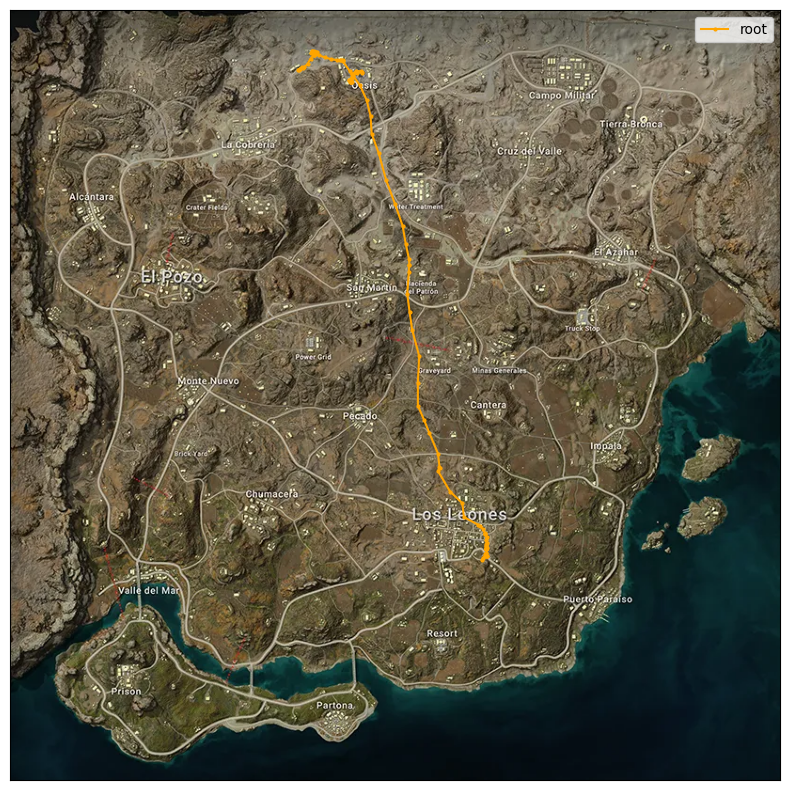

In [ ]:
# 지도 이미지 불러오기
img = Image.open(map_image_path)
img_width, img_height = img.size


# 시각화
fig, ax = plt.subplots(figsize=(10, 10))  # 그래프 크기를 키움
ax.set_aspect('equal')

# 지도 이미지 추가
ax.imshow(img, extent=[0, img_width, 0, img_height])

# 이동 경로를 점선으로 추가 (이미지 좌표 사용)
ax.plot(wak_position['character.location.x'], wak_position['character.location.y'], marker='o',ms=2, color='orange', label='root')

plt.legend()
plt.xlim(0, img_width)
plt.ylim(0, img_height)

ax.set_xticks([])  # x축 라벨 제거
ax.set_yticks([])  # y축 라벨 제거

# 그래프 표시
plt.show()


In [ ]:
sample_zone

index                               matchId  \
62   6718  df03fe5b-e7b1-4359-942a-08b1ec2dd810   

    gameState.safetyZonePosition.x  gameState.safetyZonePosition.y  \
62                        408000.0                        408000.0   

    gameState.safetyZoneRadius                               _D  count  \
62                  581999.125 2024-06-19 17:45:14.021000+00:00     33   

    during_time  page  next_blueZoneRadius  next_blueZone.x  next_blueZone.y  \
62      320.032     1          203699.6875      571146.6875    198902.359375   

     img_x   img_y  img_radius  
62  417.69  401.31  595.821604

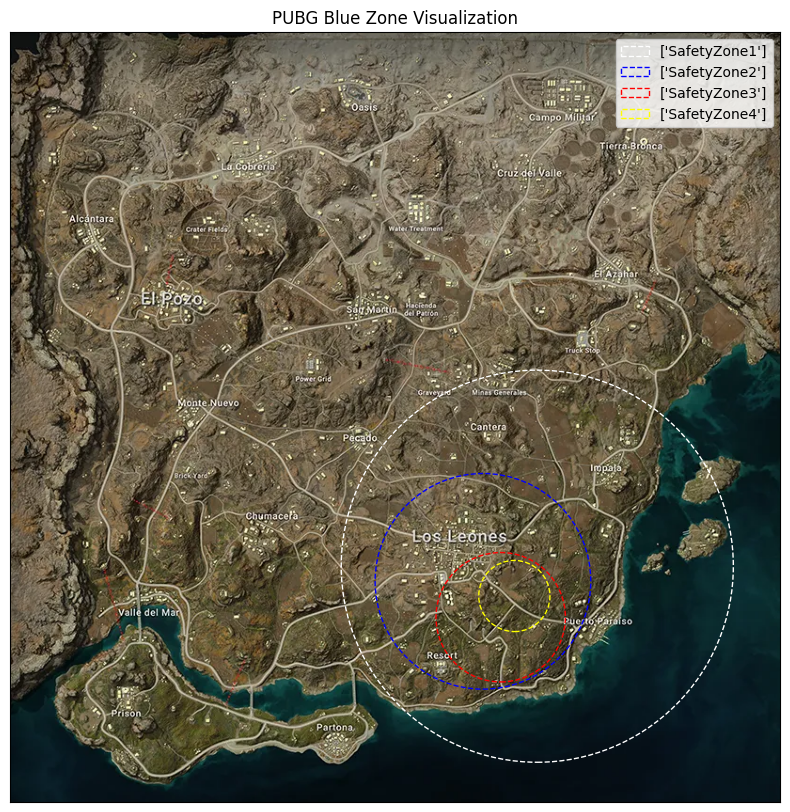

In [ ]:
# 시각화
fig, ax = plt.subplots(figsize=(10, 10))  # 그래프 크기를 키움

# 지도 이미지 추가
ax.imshow(img, extent=[0, img_width, 0, img_height])


colors = ['white','blue','red','yellow']
# 블루존 원 그리기
for i in range(len(sm)):
    circle = Circle((sm['img_x'][i], sm['img_y'][i]),
                    sm['img_radius'][i],
                    color=colors[i], fill=False, linestyle='--',label=[f'SafetyZone{i+1}'])
    ax.add_patch(circle)


# 이동 경로를 점선으로 추가 (이미지 좌표 사용)
# ax.plot(wak_position['character.location.x'], wak_position['character.location.y'], linestyle='--' ,marker='o' ,ms=2, color='orange', label='root',zorder=1)

# 자기장이 정의되고 유저의 위치
# ax.scatter(sm['lag.character.location.x'], sm['lag.character.location.y'], marker='o', color=colors,label='user_position',zorder=2) #  ms = 1

# 범례와 축 설정
plt.legend()
plt.xlim(0, img_width)
plt.ylim(0, img_height)
ax.set_xticks([])  # x축 라벨 제거
ax.set_yticks([])  # y축 라벨 제거
plt.title('PUBG Blue Zone Visualization')

# 그래프 표시
plt.show()


In [ ]:
df[(df['matchId'] == id) & (df['character.name'] == 'StarTree')]

Empty DataFrame
Columns: [matchId, MapName, _D, _T, character.name, character.location.x, character.location.y, character.location.z, character.isInBlueZone, character.zone, elapsedTime, gameState.safetyZonePosition.x, gameState.safetyZonePosition.y, gameState.safetyZoneRadius, victim.name, damageReason, victimWeapon, victim.health, victim.location.x, victim.location.y, victim.location.z, victim.isInBlueZone, dBNOMaker.name, dBNODamageInfo.damageReason, dBNODamageInfo.damageTypeCategory, dBNODamageInfo.damageCauserName, dBNODamageInfo.additionalInfo, dBNODamageInfo.distance, dBNOMaker.isInBlueZone, killer.name, killer.health, killerDamageInfo.damageReason, killerDamageInfo.damageTypeCategory, killerDamageInfo.damageCauserName, killerDamageInfo.additionalInfo, killer.location.x, killer.location.y, killer.location.z, killerDamageInfo.distance, killer.isInBlueZone]
Index: []

### 추가 분석주제
* 고지대 영역을 먹으면 싸우는데 유리할까?
* SR, DMR 관련한 지표
* 다음 컨텐츠 하렘배그 관련 분석 주제
* SMG vs AR  1:1 상황에서의 승자는?


##  우왁굳님의 하렘배그 컨텐츠 7월 21일 시작
* 1명의 남자 + 3명의 여자 스쿼드로 이뤄지는 경기
* 한 명의 남주인공을 놓고 3인 이상의 히로인이 로맨스를 위해 경쟁, 공존하는 연애물 장르

#### 분석주제 우왁굳 하렘배그 지표

[여성 참가자]

##### part1. 파밍 부분

* 죠시료쿠 3형제 : 남자팀원을 가장 많이 살린 사람 (revive) + 가장 많은 서포터템을 챙긴 사람 (비밀방, 힐템, 탄방어막)

##### part2. 전투력 부분
> 나는 남자만 '패' : 상대 남자팀에게 가장 많은 데미지를 준 여성 버튜버

##### 샷발
* (AR, SMG) 30m 미만의 거리에서 가장 높은 정확도와 데미지를 가한 유저
* (SR, DMR) 50m 이상의 거리에서 가장 높은 정확도와 데미지를 가한 유저

##### part3. 예능 부분

* 나는 고기방 '패' : 가장 많이 데미지를 맞은 여성 버튜버,
* 팀원을 가장많이 떼린 사람

[남성 참가자]


In [ ]:
url = '/content/drive/MyDrive/PUBG/haram_log.csv'
df = load_csv_in_chunks(url)

<ipython-input-4-d5be14749058>:118: DtypeWarning: Columns (0,4,17,26,27,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,52,53,54,56,57,58,60,61,62,69,70,71,72,74,75,76,104,106,107,108,109,111,112,113,114,115,117,118,119,127,128,129,130,131,132,133,135,139,140,141,142,145,153,154,155,156,157,158,159,160,162,164,168,169,170,171,188,189,190,191,192,200,201,202,203,204,205,206,207,208,209,210,212,213,221,222,223,224,225,226,227,228,229,230,231,233,234,242,243,244,245,246,247,248,249,250,251,252,254,256,259,263,264,270,271,279,280,281,283,284,285,286) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.concat(chunks)


In [ ]:
df = df.drop_duplicates(keep=False)


In [ ]:
sample = df[df['matchId'] == '3212089f-4a7f-4657-ac3b-7c4a97a54b09']

In [ ]:
pd.DataFrame(df.columns)

In [ ]:
# 남자 참가자
man_list = [
            "RUSUK_", "ChunYang", "roentgenium111", "collett",  "BusinessKim",
            "Hiki_King","SENO5", "ButterusIII", "greatmoonaroma", "Captain_Sullivan",
            "Real_Dr_Dopamine", "LeeDukSooHalabye", "realchunshik", "Wakpago", "B_ver_",
            "GlLbert", "soosemi432", "Amadeuschoi", "LOVE_JenToo", "diejinhe",
            "Bujungingan", 'DACK-BAL' ,'KWONMIN_', 'BEITER_', 'KIMCHI_MANDU'
          ]



In [ ]:
df['_T'].unique()

array(['LogMatchDefinition', 'LogPlayerLogin', 'LogPlayerCreate',
       'LogPlayerPosition', 'LogPlayerAttack', 'LogVaultStart',
       'LogObjectInteraction', 'LogMatchStart', 'LogVehicleRide',
       'LogItemEquip', 'LogItemPickup', 'LogGameStatePeriodic',
       'LogVehicleLeave', 'LogItemUnequip', 'LogParachuteLanding',
       'LogItemDrop', 'LogItemAttach', 'LogItemUse', 'LogItemDetach',
       'LogPlayerTakeDamage', 'LogPhaseChange', 'LogObjectDestroy',
       'LogPlayerMakeGroggy', 'LogHeal', 'LogPlayerRevive',
       'LogVehicleDamage', 'LogItemPutToVehicleTrunk',
       'LogWeaponFireCount', 'LogCharacterCarry', 'LogWheelDestroy',
       'LogCarePackageSpawn', 'LogItemPickupFromVehicleTrunk',
       'LogCarePackageLand', 'LogPlayerUseThrowable', 'LogPlayerKillV2',
       'LogItemPickupFromLootBox', 'LogArmorDestroy', 'LogPlayerLogout',
       'LogItemPickupFromCarepackage', 'LogVehicleDestroy', 'LogMatchEnd',
       'LogSwimStart', 'LogSwimEnd', 'LogPlayerUseFlareGun',
      

In [ ]:
# 라벨링 여성,남성참가자

df['character.type'] = df['character.name'].apply(lambda x: 'man' if x in man_list else 'vtuber')
df['attacker.type'] = df['attacker.name'].apply(lambda x: 'man' if x in man_list else 'vtuber')
df['victim.type'] = df['victim.name'].apply(lambda x: 'man' if x in man_list else 'vtuber')
df['killer.type'] = df['killer.name'].apply(lambda x: 'man' if x in man_list else 'vtuber')
df['reviver.type'] = df['reviver.name'].apply(lambda x: 'man' if x in man_list else 'vtuber')

* revive dataframe

In [ ]:

reviver_cols = [col for col
                in df.columns if 'reviver' in col]


attack_cols =  [col for col
                in df.columns if 'attacker' in col]


vic_cols=['victim.name',	'victim.teamId',	'victim.health',	'victim.location.x',	'victim.location.y', 'victim.location.z']


# 쓰러진 "남성참가자" 를 누가 가장 많이 살렸는지
revive_df = df[(df['_T'] == 'LogPlayerRevive')][['matchId','MapName','_D','_T'] + vic_cols + reviver_cols]


In [ ]:
revive_df.groupby(['reviver.name']).agg(
    cnt = pd.NamedAgg(column='reviver.name',aggfunc='count')
).sort_values(by=['cnt'],ascending=False)

cnt
reviver.name         
GreatMoonAroma      7
jjamdoeun           5
diejinhe            4
Upi__1              4
BEITER_             4
Too_Cats            4
ddejjy              4
manlmanl            4
jaesu111            3
GO_sum_mer          3
MyongC_             3
e_omon              3
42dada_             3
deathhammer_loky    3
roentgenium111      3
B_ver_              3
YEORUMI_030         3
hadiaaa             2
danchu17            2
im_mizi             2
LOVE_JenToo         2
Kya_Ang             2
AmadeusChoi         2
Hi_Alice_           2
BusinessKim         2
mingyeolhee         2
HANGYEOL8008        2
navianx             2
DreamsYeosa         2
x_xvvvvv            2
DACK-BAL            2
YangDoki            2
wwg_Charlotte       2
ChunYang            2
ubbly               2
ming-turn           1
chebi_444           1
niffffff            1
sellkey_2           1
realchunshik        1
dogcat_0926         1
neez__              1
bomsei_             1
SIRIAN_SPS          1
YUNA0_              1
Hiki_King           1
Arari_-             1
BBoRinGirl          1
BICHON-3-           1
ButterusIII         1
Captain_Sullivan    1
Cocoyangg           1
Collett             1
DAEM0RI             1
H1R4_               1
HANSEGIN            1
ISD-GOSEGU          1
Wellro              1
KwonMin98           1
LeeDukSooHalabye    1
MILKLARGE           1
NEWMAYO             1
NE_NARA_            1
RUSUK_              1
S2aryn              1
Secretgirl_486      1
TIFFANY_0421        1
U___cherry          1
yuruchuru           1

* killdataframe

In [ ]:
# 특정 플레이어 로그 보기
kill_df = df[df['_T'].isin(['LogPlayerKillV2','LogPlayerAttack','LogPlayerTakeDamage','LogPlayerMakeGroggy'])] # 'LogPlayerKillV2','LogPlayerAttack',,'LogItemDrop','LogItemDetach','LogItemAttach','LogItemEquip','LogItemPickup'
cols =             ['matchId','_D','_T', 'attacker.type',
                  'character.name','character.health','healAmount','weaponId','damageCauserName', # healLog와 관련된 컬럼item.itemId weapon.itemId weaponId isCustomGame gameState.numParticipatedPlayers distance damageCauserName damageReason
                  'attacker.name','attackType','attacker.health','attacker.location.x', 'attacker.location.y','attacker.location.z','damageTypeCategory','damage','weapon.itemId','weapon.stackCount','fireWeaponStackCount', # 공격 하나하나 관련된 로그 (당시 공격한 위치는 나오지 않음, 맞은 경우 나옴)
                  'victim.name','damageReason','victimWeapon','victim.health','victim.location.x', 'victim.location.y','victim.location.z','victimWeaponAdditionalInfo','assists_AccountId','victimGameResult.stats.statTrakDataPairs','victimGameResult.stats.headshotStatTrakDataPairs' ,# 피해를 받은 유저
                  'dBNOMaker.name','dBNODamageInfo.damageReason','dBNODamageInfo.damageTypeCategory','dBNODamageInfo.damageCauserName','dBNODamageInfo.additionalInfo','dBNODamageInfo.distance', # 기절을 만든 유저
                  'finisher.name','finisher.health','finishDamageInfo.damageReason','finishDamageInfo.damageTypeCategory','finishDamageInfo.damageCauserName','finishDamageInfo.additionalInfo','finishDamageInfo.distance', # 마무리 유저?
                  'killer.name','killer.health','killerDamageInfo.damageReason','killerDamageInfo.damageTypeCategory','killerDamageInfo.damageCauserName','killerDamageInfo.additionalInfo',
                  'killer.location.x', 'killer.location.y','killer.location.z','killerDamageInfo.distance','fireWeaponStackCount'
                  ] # 킬러 유저?

kill_df = kill_df[cols]


damage_gun_df = kill_df[
    ((kill_df['_T'] == 'LogPlayerAttack') & (kill_df['attackType'] == 'Weapon') & (kill_df['weapon.itemId'] != 'Item_Weapon_Apple_C') & (kill_df['weapon.itemId'].notna())) |
    ((kill_df['_T'] == 'LogPlayerTakeDamage') & (kill_df['damageTypeCategory'] == 'Damage_Gun')) |
    ((kill_df['_T'] == 'LogPlayerKillV2') & (kill_df['killerDamageInfo.damageTypeCategory'] == 'Damage_Gun')) |
    ((kill_df['_T'] == 'LogPlayerMakeGroggy') & (kill_df['damageTypeCategory'] == 'Damage_Gun')) # monster_bear
]


# 매핑 함수 정의
def map_weapon_id(row):
    if not pd.isna(row['damageCauserName']) and row['damageCauserName'] in mapping.values():
        for key, value in mapping.items():
            if value == row['damageCauserName']:
                return key
    else:
        return row['weapon.itemId']

# weapon.itemId 열에 매핑된 값을 추가
damage_gun_df['weapon.itemId'] = damage_gun_df.apply(map_weapon_id, axis=1)

# 총기 장르 추가
damage_gun_df['weapon.genre'] = [
    'AR' if item in AR else
    'DMR' if item in DMR else
    'SR' if item in SR else
    'SG' if item in SG else
    'SMG' if item in SMG else
    'LMG' if item in LMG else
    'Special' if item in Special else
    'Unknown'
    for item in damage_gun_df['weapon.itemId']
]



<ipython-input-216-ecc7fd3895d7>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_gun_df['weapon.itemId'] = damage_gun_df.apply(map_weapon_id, axis=1)
<ipython-input-216-ecc7fd3895d7>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_gun_df['weapon.genre'] = [


In [ ]:
# damage_gun_df = damage_gun_df[damage_gun_df['_T'] =='LogPlayerTakeDamage']

# 거리 계산을 위한 데이터만 선택
coords = damage_gun_df[['attacker.location.x', 'attacker.location.y', 'attacker.location.z',
                        'victim.location.x', 'victim.location.y', 'victim.location.z']] #  'killer.location.x', 'killer.location.y', 'killer.location.z'

# NaN 값이 있는 행 건너뛰고 거리 계산하여 'distance' 열에 추가
damage_gun_df['distance'] = damage_gun_df.apply(lambda row:
                                                euclidean((row['attacker.location.x'], row['attacker.location.y'], row['attacker.location.z']),
                                                          (row['victim.location.x'], row['victim.location.y'], row['victim.location.z'])) / 100
                                                if not row[['attacker.location.x', 'attacker.location.y', 'attacker.location.z',
                                                            'victim.location.x', 'victim.location.y', 'victim.location.z']].isnull().any()
                                                else float('NaN'),
                                                axis=1)

# NaN 값이 있는 행 건너뛰고 killerDamageInfo.distance 값이 음수인 경우에만 거리 계산하여 'kill_distance' 열에 추가
damage_gun_df['killerDamageInfo.distance'] = damage_gun_df['killerDamageInfo.distance'] / 100

<ipython-input-217-5bd0799576c2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_gun_df['distance'] = damage_gun_df.apply(lambda row:
<ipython-input-217-5bd0799576c2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_gun_df['killerDamageInfo.distance'] = damage_gun_df['killerDamageInfo.distance'] / 100


In [ ]:
# 남성에게 가장 많이 데미지를 입힌 여성 버튜버는? attacker.name = 여성 / victim.name = 남성
# player_df[player_df['_T'] == 'LogPlayerTakeDamage']
cols =  (damage_gun_df['attacker.name'].isin(v_list)) | (damage_gun_df['killer.name'].isin(v_list)) | (damage_gun_df['finisher.name'].isin(v_list)) #| (damage_gun_df['victim.name'].isin(man_list))
player_df = damage_gun_df[cols]
player_df

Empty DataFrame
Columns: [matchId, _D, _T, character.name, character.health, healAmount, weaponId, damageCauserName, attacker.name, attackType, attacker.health, attacker.location.x, attacker.location.y, attacker.location.z, damageTypeCategory, damage, weapon.itemId, weapon.stackCount, fireWeaponStackCount, victim.name, damageReason, victimWeapon, victim.health, victim.location.x, victim.location.y, victim.location.z, victimWeaponAdditionalInfo, assists_AccountId, victimGameResult.stats.statTrakDataPairs, victimGameResult.stats.headshotStatTrakDataPairs, dBNOMaker.name, dBNODamageInfo.damageReason, dBNODamageInfo.damageTypeCategory, dBNODamageInfo.damageCauserName, dBNODamageInfo.additionalInfo, dBNODamageInfo.distance, finisher.name, finisher.health, finishDamageInfo.damageReason, finishDamageInfo.damageTypeCategory, finishDamageInfo.damageCauserName, finishDamageInfo.additionalInfo, finishDamageInfo.distance, killer.name, killer.health, killerDamageInfo.damageReason, killerDamageInfo.damageTypeCategory, killerDamageInfo.damageCauserName, killerDamageInfo.additionalInfo, killer.location.x, killer.location.y, killer.location.z, killerDamageInfo.distance, fireWeaponStackCount, weapon.genre, distance]
Index: []

In [ ]:
damage_gun_df.head()

* 단순 hit , shot 통계

In [ ]:
ar_cons = (damage_gun_df['weapon.genre'].isin(['AR','SMG']))

ar_shot = damage_gun_df[(damage_gun_df['_T']  == 'LogPlayerAttack') & ar_cons].groupby(['attacker.name','attacker.type','weapon.genre']).agg(
    shot = pd.NamedAgg(column='_T',aggfunc='count'),
)

ar_hit = damage_gun_df[(damage_gun_df['_T']  == 'LogPlayerTakeDamage') & ar_cons].groupby(['attacker.name','attacker.type','weapon.genre']).agg(
   hit = pd.NamedAgg(column='_T',aggfunc='count'),
   damage = pd.NamedAgg(column='damage',aggfunc='sum'),
   )



sr_cons = (damage_gun_df['weapon.genre'].isin(['SR','DMR']))

sr_shot = damage_gun_df[(damage_gun_df['_T']  == 'LogPlayerAttack') & sr_cons].groupby(['attacker.name','attacker.type','weapon.genre']).agg(
    shot = pd.NamedAgg(column='_T',aggfunc='count'),
)


sr_hit = damage_gun_df[(damage_gun_df['_T']  == 'LogPlayerTakeDamage') & sr_cons ].groupby(['attacker.name','attacker.type','weapon.genre']).agg(
    hit = pd.NamedAgg(column='damage',aggfunc='count'),
   damage = pd.NamedAgg(column='damage',aggfunc='sum'),
   max_distance = pd.NamedAgg(column='distance',aggfunc='max')
   )
ar = pd.merge(ar_shot,ar_hit,on=['attacker.name','attacker.type','weapon.genre'], how= 'left').fillna(0).round(0)
sr = pd.merge(sr_shot,sr_hit,on=['attacker.name','attacker.type','weapon.genre'], how= 'left').fillna(0).round(0).reset_index()


In [ ]:
damage_gun_df[(damage_gun_df['attacker.name'] == 'VLYZ-MOONMOMO') & (damage_gun_df['_T'] == 'LogPlayerTakeDamage')]

In [ ]:
ar_hit

hit       damage  mean_distance  \
attacker.name    attacker.type weapon.genre                                    
0w0_zzz          vtuber        SMG            12    69.799288      24.988352   
42dada_          vtuber        AR              1    28.700001      53.928801   
ANUNGE           vtuber        AR             18   380.799994      24.042068   
Arari_-          vtuber        AR             58   752.090631      10.200318   
BBoRinGirl       vtuber        AR             45   606.242962      39.833877   
BICHON-3-        vtuber        AR            117  1603.067312      28.841285   
Charmante_owo    vtuber        AR              8   154.120006      16.055522   
Cocoyangg        vtuber        AR             14   189.793407      32.156000   
DAEM0RI          vtuber        AR             22   433.793053      27.912298   
DALTA__          vtuber        AR             10   158.790440      34.176898   
DamBio_o         vtuber        AR             50   856.840016      31.813475   
                               SMG            37   516.623801       6.792221   
DreamsYeosa      vtuber        AR             53   629.024251      33.615748   
EON_SAHI         vtuber        SMG             9   144.055145      29.825353   
GO_sum_mer       vtuber        AR              3    58.045833      16.837717   
                               SMG            28   240.215655      16.738385   
H1R4_            vtuber        AR              5    65.000000       9.633170   
HANGYEOL8008     vtuber        AR             11   292.261203       6.826545   
HANSEGIN         vtuber        AR              9   125.740000      23.097082   
                               SMG            14   220.500002      14.041657   
HO-BAL           vtuber        AR              8   215.999994      20.330343   
Haesusu_         vtuber        SMG            26   257.434511      12.561631   
Hi_Alice_        vtuber        AR             25   449.313469      28.016264   
ISD-GOSEGU       vtuber        SMG            53   293.599476      16.171195   
KimMickey_       vtuber        AR             18   296.199993      11.829436   
Kya_Ang          vtuber        AR              9   181.359999       7.625743   
MILKLARGE        vtuber        AR             15   165.995903      12.260019   
                               SMG            15   109.921875      14.642294   
MyongC_          vtuber        AR             97  1609.112346      20.909084   
NEWMAYO          vtuber        SMG            14   156.816433      12.121147   
NE_NARA_         vtuber        AR              5    87.797684      83.773022   
NanWony-_-       vtuber        AR             82  1325.375197      27.434355   
Rofany__         vtuber        AR             29   244.399998      25.902626   
S2aryn           vtuber        AR             86  1077.693726      30.506282   
SIRIAN_SPS       vtuber        AR              3    60.808298     126.028745   
                               SMG            14   127.660485      20.400038   
SooBni_          vtuber        AR             38   560.773808      27.553616   
TIFFANY_0421     vtuber        SMG             6    75.000000       8.085344   
Too_Cats         vtuber        AR             21   217.369995      23.080323   
U___cherry       vtuber        AR             11    33.756996       9.810051   
Upi__1           vtuber        AR              5   125.757496      18.772893   
VLYZ-MOONMOMO    vtuber        AR              1    25.080000       0.888413   
                               SMG             1    21.085690      23.542991   
Victory_W_       vtuber        AR              7    22.571903      31.604695   
Wellro           vtuber        AR             18   349.371338      41.775614   
YEORUMI_030      vtuber        AR              2    23.865761     173.676708   
YUNA0_           vtuber        AR             73  1044.335033      24.934546   
YangDoki         vtuber        AR             13   170.677855      23.080133   
bin__s           vtuber        AR            

* 난사하는 상황에서의 거리별 통계

In [ ]:
# damageReason 값을 더미 변수로 변환, 컬럼으로 피봇하여 여부확인
damage_dummies = pd.get_dummies(damage_gun_df['damageReason'])
result_df = pd.concat([damage_gun_df, damage_dummies], axis=1)

In [ ]:
attack_col = ['_D','_T','attacker.name','weapon.itemId']
dmg_col = ['_D','_T','damageCauserName','attacker.name', 'damageTypeCategory','damage','weapon.itemId','ArmShot',	'HeadShot',	'LegShot',	'PelvisShot',	'TorsoShot','distance','victim.name'] # NonSpecific'

# 모든 유저에 위 과정을 적용 시키면
# 초단위를 제외한 시간값 추가
result_df['_D'] = pd.to_datetime(result_df['_D']) #.dt.strftime('%Y-%m-%dT%H:%M:%S')

weapon_shot = result_df[result_df['_T'] == 'LogPlayerAttack'][attack_col]
weapon_shot = weapon_shot.groupby(['attacker.name',pd.Grouper(key='_D', freq='5S'),'weapon.itemId']).agg(
    shot = pd.NamedAgg(column='_T',aggfunc='count')
).reset_index()


weapon_hit = result_df[result_df['_T'] == 'LogPlayerTakeDamage'][dmg_col]
weapon_hit = weapon_hit.groupby(['attacker.name',pd.Grouper(key='_D', freq='5S'),'weapon.itemId','victim.name']).agg(
    hit = pd.NamedAgg(column='_T',aggfunc='count'),
    distanceMean = pd.NamedAgg(column='distance',aggfunc='mean'),
    ArmShot = pd.NamedAgg(column='ArmShot',aggfunc='sum'),
    HeadShot = pd.NamedAgg(column='HeadShot',aggfunc='sum'),
    LegShot = pd.NamedAgg(column='LegShot',aggfunc='sum'),
    PelvisShot = pd.NamedAgg(column='PelvisShot',aggfunc='sum'),
    TorsoShot = pd.NamedAgg(column='TorsoShot',aggfunc='sum'),
    # NonSpecific = pd.NamedAgg(column='NonSpecific', aggfunc='sum'),
    damage = pd.NamedAgg(column='damage',aggfunc='sum')
).reset_index()

# shot을 기준으로 merge 해야한다.
merged_df = pd.merge(weapon_shot, weapon_hit,
                    left_on=['attacker.name', '_D','weapon.itemId'],
                    right_on=['attacker.name', '_D','weapon.itemId'],
                    how='left')

In [ ]:
merged_df[merged_df['attacker.name'] =='wakgood']

In [ ]:
merged_df[['hit','ArmShot','HeadShot',	'LegShot',	'PelvisShot',	'TorsoShot','damage']] = merged_df[['hit','ArmShot','HeadShot',	'LegShot',	'PelvisShot',	'TorsoShot','damage']].fillna(0).astype(int)

# 총기 장르 추가
merged_df['weapon.genre'] = [
    'AR' if item in AR else
    'DMR' if item in DMR else
    'SR' if item in SR else
    'SG' if item in SG else
    'SMG' if item in SMG else
    'LMG' if item in LMG else
    'Special' if item in Special else
    'Unknown'
    for item in merged_df['weapon.itemId']
]
# 정확도 계산
col = ['weapon.genre','weapon.itemId','shot','hit','distanceMean','distance_category','ratio']
merged_df['ratio'] = merged_df['hit']*100 / merged_df['shot']
merged_df['miss'] = merged_df['shot'] - merged_df['hit']
merged_df[['ratio','distanceMean']] = merged_df[['ratio','distanceMean']].fillna(0).astype(int)

In [ ]:
# AR 기준
# 범주형 컬럼 생성
bins = [i for i in range(0, 50, 10)] + [float('inf')]
labels = [f'{i}~{i+10}' for i in range(0, 40, 10)] + ['40 이상']
# 범주형 컬럼 생성
merged_df['distance_category'] = pd.cut(merged_df['distanceMean'], bins=bins, labels=labels, right=False)

# 5초동안 shot을 10번이상한 경우
AR_df = merged_df[
    (merged_df['distanceMean'] > 0) &
    (merged_df['distanceMean'] < 300) &
    (merged_df['shot'] > 5) &
    (merged_df['weapon.genre'].isin(['AR','SMG']))
    # (merged_df['weapon.itemId'].isin(['Item_Weapon_HK416_C','Item_Weapon_AUG_C','Item_Weapon_ACE32_C']))
    ]# [col] #shot_1000m #



SR_df = merged_df[
    (merged_df['distanceMean'] > 0) &
    (merged_df['distanceMean'] < 500) &
    (merged_df['shot'] > 5) &
    (merged_df['weapon.genre'].isin(['SR','DMG']))
    # (merged_df['weapon.itemId'].isin(['Item_Weapon_HK416_C','Item_Weapon_AUG_C','Item_Weapon_ACE32_C']))
    ]# [col] #shot_1000m #


In [ ]:
AR_df[AR_df['attacker.name'] == 'x_xvvvvv']

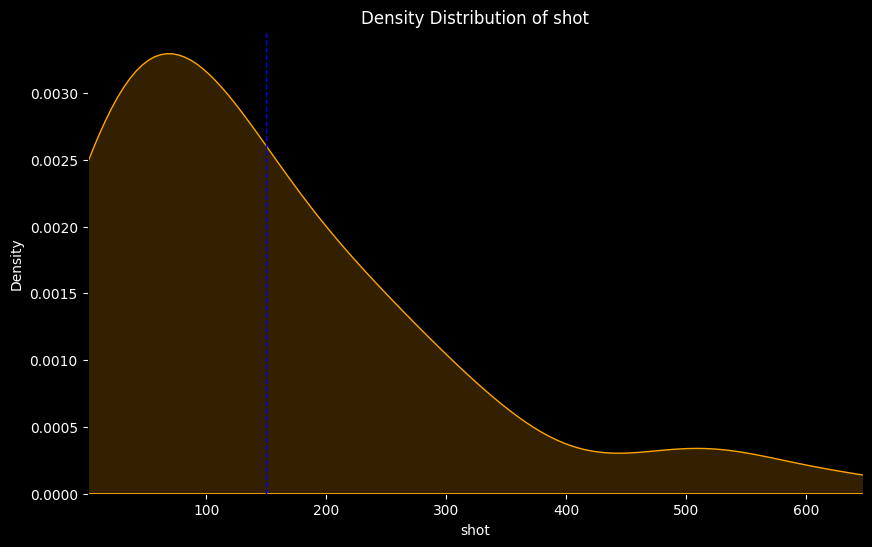

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

min_value = ar_shot['shot'].min()
max_value = ar_shot['shot'].max()
mean_value = ar_shot['shot'].mean()
# 밀도 분포 그리기
plt.figure(figsize=(10, 6))
sns.kdeplot(ar_shot['shot'], color='orange', fill=True, alpha=0.2, label='time_diff')

plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label='wak')

# 축 및 레이블 설정
plt.xlabel('shot', color='white')
plt.ylabel('Density', color='white')
plt.title('Density Distribution of shot', color='white')

# 눈금 및 눈금 레이블 색상 변경
plt.tick_params(colors='white', which='both')  # x, y축의 눈금 색상 모두 변경

# X축 범위 설정
plt.xlim(min_value, max_value)

# 배경색 설정
ax = plt.gca()
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# 그래프 표시
# plt.grid(True)
plt.show()


In [ ]:
# 1초동안 5번이상 SHOT했을때, 총기들의 거리별 정확도
AR_hit_df = AR_df.groupby(['attacker.name','distance_category']).agg(

                        HeadShot = pd.NamedAgg(column='HeadShot', aggfunc='sum'),
                        ArmShot = pd.NamedAgg(column='ArmShot', aggfunc='sum'),
                        LegShot = pd.NamedAgg(column='LegShot', aggfunc='sum'),
                        PelvisShot = pd.NamedAgg(column='PelvisShot', aggfunc='sum'),
                        TorsoShot = pd.NamedAgg(column='TorsoShot', aggfunc='sum'),
                        shot = pd.NamedAgg(column='shot',aggfunc='sum'),
                        hit = pd.NamedAgg(column='hit',aggfunc='sum'),
                        ratio = pd.NamedAgg(column='ratio', aggfunc='mean'),
                        ).reset_index().sort_values(by=['distance_category','ratio'],ascending=False)


AR_hit_df_40 = AR_hit_df[AR_hit_df['shot'] >= 80]
AR_hit_df_40['rank'] = AR_hit_df_40.groupby('distance_category')['ratio'].rank(ascending=False, method='first')


<ipython-input-254-72b52f49a15e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AR_hit_df_40['rank'] = AR_hit_df_40.groupby('distance_category')['ratio'].rank(ascending=False, method='first')


In [ ]:
AR_hit_df_40['ratio_2'] = AR_hit_df_40['hit'] / AR_hit_df_40['shot']
AR_hit_df_40[AR_hit_df_40['rank'] <4]

<ipython-input-255-a406ed6fa060>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AR_hit_df_40['ratio_2'] = AR_hit_df_40['hit'] / AR_hit_df_40['shot']


attacker.name distance_category  HeadShot  ArmShot  LegShot  PelvisShot  \
344      x_xvvvvv             40 이상         0        2        4           1   
24      BICHON-3-             40 이상         1        4        3           2   
19     BBoRinGirl             40 이상         1        2        4           1   
23      BICHON-3-             30~40         0        6        4           4   
203        bin__s             30~40         1        5        2           1   
143        S2aryn             30~40         2        3        3           4   
142        S2aryn             20~30         0        1        4           5   
17     BBoRinGirl             20~30         0        2        5           1   
162      Too_Cats             20~30         0        0        6           2   
131    NanWony-_-             10~20         4        3        2           2   
46       DamBio_o             10~20         2        4        3           5   
116       MyongC_             10~20         6        3        7           2   
45       DamBio_o              0~10         3        8        3           2   
205       bomsei_              0~10         3        4        6           6   
115       MyongC_              0~10         6        2        3           1   

     TorsoShot  shot  hit      ratio  rank   ratio_2  
344         12    96   19  25.571429   1.0  0.197917  
24          19   188   29  17.181818   2.0  0.154255  
19          11   208   19  12.333333   3.0  0.091346  
23          11   163   25  21.714286   1.0  0.153374  
203          6   138   15  15.285714   2.0  0.108696  
143          6   134   18  13.000000   3.0  0.134328  
142          8    96   18  23.142857   1.0  0.187500  
17           6   113   14  14.800000   2.0  0.123894  
162          5    91   13  14.000000   3.0  0.142857  
131         12    99   23  29.857143   1.0  0.232323  
46           5   104   19  22.666667   2.0  0.182692  
116         16   189   34  21.266667   3.0  0.179894  
45          20    95   36  40.500000   1.0  0.378947  
205         18   118   37  37.375000   2.0  0.313559  
115         11    85   23  32.714286   3.0  0.270588

In [ ]:
kill_df[kill_df['damageTypeCategory'].isin(['Damage_Explosion_PanzerFaustWarhead','Damage_Explosion_C4','Damage_Explosion_Vehicle','Damage_Explosion_PanzerFaustBackBlast'])]

 * 가장 많이 힐팩을 수집한 여자 버튜버

In [ ]:
# 블루칩 이용
bluechip_use = df[(df['item.itemId'] == 'Item_Bluechip_C') & (df['_T'] == 'LogItemUse')][['MapName','character.name','_D','_T','item.itemId']]

bluechip_use.groupby(['character.name']).agg(
    cnt = pd.NamedAgg(column='character.name',aggfunc='count')
)

cnt
character.name       
Cocoyangg           1
NEWMAYO             1
deathhammer_loky    1
ggumteul            1
guseulyo_97         1

In [ ]:
farming_col = ['matchId','_D','_T','MapName','GameMode',
                'character.name','character.health','character.type',
               'character.location.x', 'character.location.y','character.location.z',
                "item.itemId"	,"item.stackCount",	"item.category",
                "parentItem.itemId","parentItem.stackCount","parentItem.category", "parentItem.subCategory","parentItem.attachedItems",
                "childItem.itemId","childItem.stackCount","childItem.category","childItem.subCategory","childItem.attachedItems"]

farming_df = df[df['_T'].isin(['LogItemDrop','LogItemDetach','LogItemAttach','LogItemEquip','LogItemPickup'])][farming_col]


# Meds and Boosts and key etc
Use =['Item_Heal_Bandage_C' , 'Item_Heal_FirstAid_C' ,'Item_Heal_MedKit_C','Item_Heal_BattleReadyKit_C','Item_JerryCan_C',
      'Item_Boost_EnergyDrink_C' ,'Item_Boost_PainKiller_C', 'Item_Boost_AdrenalineSyringe_C',
      'Item_DihorOtok_Key_C', 'Item_Tiger_Key_C', 'Item_Chimera_Key_C','Item_BTSecretRoom_Key_C','Item_Bluechip_C',
      'Item_BulletproofShield_C','Item_Revival_Transmitter_C', 'Item_EmergencyPickup_C','Item_Tiger_SelfRevive_C', 'InstantRevivalKit_C']

# 세부적인 결과를 위해 itemid도 group
grouped  = farming_df[farming_df['item.itemId'].isin(Use)].groupby(['character.name','character.type','item.itemId']).agg(
   cnt = pd.NamedAgg(column='item.itemId',aggfunc='count')
).sort_values(by=['character.name'],ascending=False).reset_index()



# grouped = grouped[grouped['character.name'].isin(v_list)]
grouped['total_cnt'] = grouped.groupby(['character.name'])['cnt'].transform('sum') # 어차피 같은 유저이므로 matchid는 빼자 , 총경기, 캐릭터별 파밍개수를 구해야하니
grouped.sort_values(by=['total_cnt','character.name'],ascending=False)

character.name character.type                     item.itemId  cnt  \
344        NanWony-_-         vtuber             Item_Heal_Bandage_C   11   
345        NanWony-_-         vtuber        Item_Boost_EnergyDrink_C   27   
346        NanWony-_-         vtuber         Item_Boost_PainKiller_C   14   
347        NanWony-_-         vtuber        Item_BulletproofShield_C    1   
348        NanWony-_-         vtuber          Item_EmergencyPickup_C    2   
349        NanWony-_-         vtuber              Item_Heal_MedKit_C    1   
350        NanWony-_-         vtuber                 Item_JerryCan_C   13   
351        NanWony-_-         vtuber            Item_Heal_FirstAid_C   22   
548         Cocoyangg         vtuber                 Item_Bluechip_C    5   
549         Cocoyangg         vtuber  Item_Boost_AdrenalineSyringe_C    4   
550         Cocoyangg         vtuber        Item_Boost_EnergyDrink_C   30   
551         Cocoyangg         vtuber         Item_Boost_PainKiller_C    9   
552         Cocoyangg         vtuber        Item_BulletproofShield_C    3   
553         Cocoyangg         vtuber             Item_Heal_Bandage_C   13   
554         Cocoyangg         vtuber            Item_Heal_FirstAid_C   19   
555         Cocoyangg         vtuber                 Item_JerryCan_C    4   
556         Cocoyangg         vtuber      Item_Revival_Transmitter_C    1   
557         Cocoyangg         vtuber              Item_Heal_MedKit_C    1   
616        BBoRinGirl         vtuber          Item_EmergencyPickup_C    4   
617        BBoRinGirl         vtuber         Item_BTSecretRoom_Key_C    1   
618        BBoRinGirl         vtuber        Item_Boost_EnergyDrink_C   24   
619        BBoRinGirl         vtuber         Item_Boost_PainKiller_C   18   
620        BBoRinGirl         vtuber             Item_Heal_Bandage_C    8   
621        BBoRinGirl         vtuber            Item_Heal_FirstAid_C   19   
622        BBoRinGirl         vtuber              Item_Heal_MedKit_C    2   
623        BBoRinGirl         vtuber                 Item_JerryCan_C    7   
624        BBoRinGirl         vtuber      Item_Revival_Transmitter_C    1   
625           Arari_-         vtuber          Item_EmergencyPickup_C    2   
626           Arari_-         vtuber  Item_Boost_AdrenalineSyringe_C    6   
627           Arari_-         vtuber        Item_Boost_EnergyDrink_C   18   
628           Arari_-         vtuber         Item_BTSecretRoom_Key_C    1   
629           Arari_-         vtuber        Item_BulletproofShield_C    1   
630           Arari_-         vtuber         Item_Boost_PainKiller_C   17   
631           Arari_-         vtuber             Item_Heal_Bandage_C   13   
632           Arari_-         vtuber              Item_Heal_MedKit_C    3   
633           Arari_-         vtuber                 Item_JerryCan_C    2   
634           Arari_-         vtuber      Item_Revival_Transmitter_C    3   
635           Arari_-         vtuber            Item_Heal_FirstAid_C   17   
490        GO_sum_mer         vtuber             Item_Heal_Bandage_C   17   
491        GO_sum_mer         vtuber                 Item_Bluechip_C    2   
492        GO_sum_mer         vtuber  Item_Boost_AdrenalineSyringe_C    2   
493        GO_sum_mer         vtuber        Item_Boost_EnergyDrink_C   19   
494        GO_sum_mer         vtuber         Item_Boost_PainKiller_C   16   
495        GO_sum_mer         vtuber            Item_Heal_FirstAid_C   21   
496        GO_sum_mer         vtuber              Item_Heal_MedKit_C    1   
497        GO_sum_mer         vtuber      Item_Heal_BattleReadyKit_C    2   
56       realchunshik            man                 Item_JerryCan_C    4   
57       realchunshik            man            Item_Heal_FirstAid_C   15   
58       realchunshik            man             Item_Heal_Bandage_C    4   
59       realchunshik            man         Item_Boost_PainKiller_C   21   
60       realchunshik            man        Item_Boost_EnergyDrink_C   33   
5  

In [ ]:
farming_df[farming_df['item.category']== 'Use']['item.itemId'].unique()


array(['Item_Boost_EnergyDrink_C', 'Item_Heal_FirstAid_C',
       'Item_Heal_Bandage_C', 'Item_Heal_MedKit_C',
       'Item_Boost_PainKiller_C', 'Item_Mountainbike_C',
       'Item_JerryCan_C', 'Item_Boost_AdrenalineSyringe_C',
       'Item_BulletproofShield_C', 'Item_EmergencyPickup_C',
       'Item_Bluechip_C', 'Item_Neon_Coin_C',
       'Item_Revival_Transmitter_C', 'Item_Heal_BattleReadyKit_C',
       'Item_Tiger_SelfRevive_C', 'InstantRevivalKit_C',
       'Item_DihorOtok_Key_C', 'Item_Tiger_Key_C', 'Item_Chimera_Key_C',
       'Item_BTSecretRoom_Key_C', 'Item_Neon_Gold_C'], dtype=object)

남성 참가자 아이디

해루석 : RUSUK_

천양 : ChunYang

뢴트게늄 : roentgenium111

코렛트 : collett

비즈니스킴 : BusinessKim

히키킹 : Hiki_King

세노 : SENO5

버터우스 : ButterusIII

대월향 : greatmoonaroma

설리반 : Captain_Sullivan

빕어 : B_ver_

도파민 : Real_Dr_Dopamine

이덕수 : LeeDukSooHalabye

곽춘식 : realchunshik

왁파고 : Wakpago

길버트 : GlLbert

수셈이 : soosemi432

아마최 : Amadeuschoi

젠투 : LOVE_JenToo

진희 : diejinhe

쿠키킹 : cookiking9

김치만두: KIMCHI_MANDU

부정형 : Bujungingan

닼발 : DACK-BAL

권민 : KWONMIN_

바이터 : BEITER_

# 지표화?


## 운
* 기존의 자기장운과 파츠운 점수화 (+ lv2 이상의 장비 완성)

## 근접전
* AR, SMG, SG 기준 - 30M 미만의 거리에서 발생한 전투 -  평균 정확도 측정

## 장거리전
* DMR, SR 30M 이상의 거리에서 발생한 전투 - 평균 정확도 측정

## 반동제어력
* 난사하는 상황에서 얼마나 반동을 잘 제어하는가 - 기존의 측정 방법

## 파밍속도
